# Final Project Airbnb Listings Kim Goodwin

# Cleaning and Pre-processing

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
raw_df = pd.read_csv('Final Project.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

<ipython-input-2-d1c0a06e5a4a>:1: DtypeWarning: Columns (53) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('Final Project.csv')


The dataset contains 494952 Airbnb listings


ID                           Listing Url     Scrape ID Last Scraped  \
0  4008728  https://www.airbnb.com/rooms/4008728  2.020000e+13     4/2/2017   
1  7778612  https://www.airbnb.com/rooms/7778612  2.020000e+13     4/2/2017   
2  8264596  https://www.airbnb.com/rooms/8264596  2.020000e+13     4/2/2017   

                                  Name  \
0  Luxurious 3 bedroom, centrum, 180m2   
1      Luxury apartment in city centre   
2     Cosy apartment across Vondelpark   

                                             Summary  \
0  ‪This luxurious apartment is situated in the c...   
1  Beautiful, large (105m2, 2 floors) and quiet a...   
2  This central located apartment will make you f...   

                                               Space  \
0  In the heart of hip & lively Amsterdam Centrum...   
1  1 living room 1 dining room 2 bedrooms 1 bathr...   
2                                                NaN   

                                         Description Experiences Offered  \
0  ‪This luxurious apartment is situated in the c...                none   
1  Beautiful, large (105m2, 2 floors) and quiet a...                none   
2  This central located apartment will make you f...                none   

                                         Picture Url  \
0  https://public.opendatasoft.com/api/datasets/1...   
1  https://public.opendatasoft.com/api/datasets/1...   
2  https://public.opendatasoft.com/api/datasets/1...   

                                      XL Picture Url Host Name  Host Since  \
0  https://a0.muscache.com/im/pictures/f3940538-4...    Lithal    9/1/2014   
1                                                NaN      Hein    2/5/2014   
2  https://a0.muscache.com/im/pictures/105168520/...  Matthieu  11/12/2014   

                               Host Location  Host Response Time  \
0      Amsterdam, North Holland, Netherlands        within a day   
1  Amsterdam, North Holland, The Netherlands  within a few hours   
2  Amsterdam, North Holland, The Netherlands                 NaN   

   Host Response Rate Host Acceptance Rate Host Neighbourhood  \
0                50.0                  NaN           Oud-West   
1               100.0                  NaN           Oud-West   
2                 NaN                  NaN           Oud-West   

   Host Listings Count  Host Total Listings Count  \
0                  1.0                        1.0   
1                  1.0                        1.0   
2                  1.0                        1.0   

                         Host Verifications  \
0    email, phone, facebook, reviews, jumio   
1  email, phone, reviews, jumio, work_email   
2    email, phone, facebook, reviews, jumio   

                                              Street Neighbourhood  \
0  Oud-West, Amsterdam, North Holland 1054 AA, Ne...      Oud-West   
1  Oud-West, Amsterdam, Noord-Holland 1053, Nethe...      Oud-West   
2  Oud-West, Amsterdam, Noord-Holland 1054, Nethe...      Oud-West   

   Neighbourhood Cleansed Neighbourhood Group Cleansed       City  \
0  De Baarsjes - Oud-West                          NaN  Amsterdam   
1  De Baarsjes - Oud-West                          NaN  Amsterdam   
2  De Baarsjes - Oud-West                          NaN  Amsterdam   

           State  Zipcode     Market          Smart Location Country Code  \
0  North Holland  1054 AA  Amsterdam  Amsterdam, Netherlands           NL   
1  Noord-Holland     1053  Amsterdam  Amsterdam, Netherlands           NL   
2  Noord-Holland     1054  Amsterdam  Amsterdam, Netherlands           NL   

       Country   Latitude  Longitude Property Type        Room Type  \
0  Netherlands  52.365237   4.878250     Apartment  Entire home/apt   
1  Netherlands  52.367309   4.873841     Apartment  Entire home/apt   
2  Netherlands  52.361944   4.866687     Apartment  Entire home/apt   

   Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
0           6.0        1.0       3.0   3.0  Real Bed   
1           4.0        1.0   

In [ ]:
cols_to_drop = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Picture Url', 'XL Picture Url', 'Host Name', 'Host Location', 'Host Neighbourhood', 'Calendar last Scraped', 'ID', 'Jurisdiction Names','Square Feet', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Weekly Price', 'Monthly Price', 'Host Acceptance Rate',]
df = raw_df.drop(cols_to_drop, axis=1)

In [ ]:
df.isna().sum()

Experiences Offered                    0
Host Since                           504
Host Response Time                115068
Host Response Rate                115068
Host Listings Count                  504
Host Total Listings Count            504
Host Verifications                   335
Street                                 0
Neighbourhood Cleansed                 0
City                                 452
State                              49793
Zipcode                            19607
Market                              5654
Smart Location                         0
Country Code                           0
Country                                0
Latitude                               0
Longitude                              0
Property Type                         10
Room Type                              0
Accommodates                          61
Bathrooms                           1524
Bedrooms                             625
Beds                                 916
Bed Type        

In [ ]:
print(df.columns)

Index(['Experiences Offered', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Calendar Updated', 'Has Availability',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'First Review', 'Last Review',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Cancellatio

Cleaning Individual Columns

City

In [ ]:
def set_field_from_lat_long(df_search, column_name, row, starting_precision):

  # Exclude Rows with Non-Null Values or Null Latitude/Longitude
  if (not pd.isnull(row[column_name])) or (pd.isnull(row['Latitude'])) or (pd.isnull(row['Longitude'])):
    return row[column_name]

  # Start with Most Precision
  rounding_decimals = starting_precision

  while True:
    lat_rounded = round(float(row['Latitude']), rounding_decimals)
    long_rounded = round(float(row['Longitude']), rounding_decimals)

    # Filter
    result = df_search[(~df_search[column_name].isna())
                & (df_search['lat_rounded'].astype(float).round(decimals=rounding_decimals) == lat_rounded)
                & (df_search['long_rounded'].astype(float).round(decimals=rounding_decimals) == long_rounded)][column_name].head(1)

    # Match
    if not result.empty:
      return result.values[0]

    # Lower Precision
    rounding_decimals = rounding_decimals - 1

    # No Match
    if rounding_decimals == 0:
      return row[column_name]

# Create a copy of the dataframe to avoid modifying the original data
df_city = df[['Latitude', 'Longitude', 'City']].copy()

# Add rounded columns to the dataframe
rounding_decimals = 3  # You can adjust this based on your needs
df_city['lat_rounded'] = df_city['Latitude'].astype(float).round(decimals=rounding_decimals)
df_city['long_rounded'] = df_city['Longitude'].astype(float).round(decimals=rounding_decimals)

# Drop unnecessary columns and remove duplicates
df_city = df_city.drop(columns=['Latitude', 'Longitude']).dropna().drop_duplicates()

# Display the number of rows to search
print("Rows to search:", df_city.shape[0])

# Apply the function to fill in the 'city' column
df['City'] = df.apply(lambda row: set_field_from_lat_long(df_city, 'City', row, rounding_decimals), axis=1)

Rows to search: 235884


Zipcode

In [ ]:
def set_field_from_lat_long(df_search, column_name, row, starting_precision):

  # Exclude Rows with Non-Null Values or Null Latitude/Longitude
  if (not pd.isnull(row[column_name])) or (pd.isnull(row['Latitude'])) or (pd.isnull(row['Longitude'])):
    return row[column_name]

  # Start with Most Precision
  rounding_decimals = starting_precision

  while True:
    lat_rounded = round(float(row['Latitude']), rounding_decimals)
    long_rounded = round(float(row['Longitude']), rounding_decimals)

    # Filter
    result = df_search[(~df_search[column_name].isna())
                & (df_search['lat_rounded'].astype(float).round(decimals=rounding_decimals) == lat_rounded)
                & (df_search['long_rounded'].astype(float).round(decimals=rounding_decimals) == long_rounded)][column_name].head(1)

    # Match
    if not result.empty:
      return result.values[0]

    # Lower Precision
    rounding_decimals = rounding_decimals - 1

    # No Match
    if rounding_decimals == 0:
      return row[column_name]

# Create a copy of the dataframe to avoid modifying the original data
df_zipcode = df[['Latitude', 'Longitude', 'Zipcode']].copy()

# Add rounded columns to the dataframe
rounding_decimals = 3  # You can adjust this based on your needs
df_zipcode['lat_rounded'] = df_zipcode['Latitude'].astype(float).round(decimals=rounding_decimals)
df_zipcode['long_rounded'] = df_zipcode['Longitude'].astype(float).round(decimals=rounding_decimals)

# Drop unnecessary columns and remove duplicates
df_zipcode = df_zipcode.drop(columns=['Latitude', 'Longitude']).dropna().drop_duplicates()

# Display the number of rows to search
print("Rows to search:", df_zipcode.shape[0])

# Apply the function to fill in the 'city' column
df['Zipcode'] = df.apply(lambda row: set_field_from_lat_long(df_zipcode, 'Zipcode', row, rounding_decimals), axis=1)

Rows to search: 264032


State

In [ ]:
def set_field_from_lat_long(df_search, column_name, row, starting_precision):

  # Exclude Rows with Non-Null Values or Null Latitude/Longitude
  if (not pd.isnull(row[column_name])) or (pd.isnull(row['Latitude'])) or (pd.isnull(row['Longitude'])):
    return row[column_name]

  # Start with Most Precision
  rounding_decimals = starting_precision

  while True:
    lat_rounded = round(float(row['Latitude']), rounding_decimals)
    long_rounded = round(float(row['Longitude']), rounding_decimals)

    # Filter
    result = df_search[(~df_search[column_name].isna())
                & (df_search['lat_rounded'].astype(float).round(decimals=rounding_decimals) == lat_rounded)
                & (df_search['long_rounded'].astype(float).round(decimals=rounding_decimals) == long_rounded)][column_name].head(1)

    # Match
    if not result.empty:
      return result.values[0]

    # Lower Precision
    rounding_decimals = rounding_decimals - 1

    # No Match
    if rounding_decimals == 0:
      return row[column_name]

# Create a copy of the dataframe to avoid modifying the original data
df_state = df[['Latitude', 'Longitude', 'State']].copy()

# Add rounded columns to the dataframe
rounding_decimals = 3  # You can adjust this based on your needs
df_state['lat_rounded'] = df_state['Latitude'].astype(float).round(decimals=rounding_decimals)
df_state['long_rounded'] = df_state['Longitude'].astype(float).round(decimals=rounding_decimals)

# Drop unnecessary columns and remove duplicates
df_state = df_state.drop(columns=['Latitude', 'Longitude']).dropna().drop_duplicates()

# Display the number of rows to search
print("Rows to search:", df_state.shape[0])

# Apply the function to fill in the 'city' column
df['State'] = df.apply(lambda row: set_field_from_lat_long(df_state, 'State', row, rounding_decimals), axis=1)

Rows to search: 224954


Market

In [ ]:
def set_field_from_lat_long(df_search, column_name, row, starting_precision):

  # Exclude Rows with Non-Null Values or Null Latitude/Longitude
  if (not pd.isnull(row[column_name])) or (pd.isnull(row['Latitude'])) or (pd.isnull(row['Longitude'])):
    return row[column_name]

  # Start with Most Precision
  rounding_decimals = starting_precision

  while True:
    lat_rounded = round(float(row['Latitude']), rounding_decimals)
    long_rounded = round(float(row['Longitude']), rounding_decimals)

    # Filter
    result = df_search[(~df_search[column_name].isna())
                & (df_search['lat_rounded'].astype(float).round(decimals=rounding_decimals) == lat_rounded)
                & (df_search['long_rounded'].astype(float).round(decimals=rounding_decimals) == long_rounded)][column_name].head(1)

    # Match
    if not result.empty:
      return result.values[0]

    # Lower Precision
    rounding_decimals = rounding_decimals - 1

    # No Match
    if rounding_decimals == 0:
      return row[column_name]

# Create a copy of the dataframe to avoid modifying the original data
df_state = df[['Latitude', 'Longitude', 'Market']].copy()

# Add rounded columns to the dataframe
rounding_decimals = 3  # You can adjust this based on your needs
df_state['lat_rounded'] = df_state['Latitude'].astype(float).round(decimals=rounding_decimals)
df_state['long_rounded'] = df_state['Longitude'].astype(float).round(decimals=rounding_decimals)

# Drop unnecessary columns and remove duplicates
df_state = df_state.drop(columns=['Latitude', 'Longitude']).dropna().drop_duplicates()

# Display the number of rows to search
print("Rows to search:", df_state.shape[0])

# Apply the function to fill in the 'city' column
df['Market']= df.apply(lambda row: set_field_from_lat_long(df_state, 'Market', row, rounding_decimals), axis=1)

Rows to search: 215021


License

In [ ]:
column_name = 'License'

In [ ]:
df[column_name].value_counts()

City registration pending      5968
145636                           46
City Registration Pending        43
Pending                          26
city registration pending        25
                               ... 
"City Registration Pending"       1
HUTB-010754-68                    1
HUTB-005187                       1
HUTB-004445                       1
VT-1376                           1
Name: License, Length: 7329, dtype: int64

In [ ]:
def set_license(value):
    if value is None or pd.isnull(value):
        return 'no_license'
    elif isinstance(value, str) and 'pending' in value.lower():
        return 'pending'
    else:
        return 'verified'

In [ ]:
df[column_name] = df[column_name].apply(set_license)

Host Verifications

In [ ]:
unique_verifications = df['Host Verifications'].unique()
print(unique_verifications)

['email, phone, facebook, reviews, jumio'
 'email, phone, reviews, jumio, work_email' 'email, phone, reviews, jumio'
 ... 'email, phone, facebook, reviews, weibo, kba, work_email'
 'email, phone, facebook, manual_offline, kba'
 'email, phone, facebook, google, linkedin, amex, reviews, jumio, offline_government_id, kba, selfie, government_id, identity_manual, work_email']


In [ ]:
# Convert all values in the 'Host Verifications' column to strings
amenities_list = [str(x) for x in df['Host Verifications']]

# Create a string of all amenities
amenities_list_string = " ".join(amenities_list)

# Remove unnecessary characters and split into a set
amenities_list_string = amenities_list_string.replace('{', '').replace('}', ',').replace('"', '')
amenities_set = {x.strip() for x in amenities_list_string.split(',')}

# Now, amenities_set should contain all possible amenities as a set

In [ ]:
# Create binary columns for specific Host Verifications
df['email'] = df['Host Verifications'].str.contains('email|work_email|').fillna(False).astype(int)
df['phone'] = df['Host Verifications'].str.contains('phone').fillna(False).astype(int)
df['facebook'] = df['Host Verifications'].str.contains('facebook').fillna(False).astype(int)
df['reviews'] = df['Host Verifications'].str.contains('reviews').fillna(False).astype(int)
df['jumio'] = df['Host Verifications'].str.contains('jumio').fillna(False).astype(int)
df['facebook'] = df['Host Verifications'].str.contains('facebook').fillna(False).astype(int)
df['weibo'] = df['Host Verifications'].str.contains('weibo').fillna(False).astype(int)
df['kba'] = df['Host Verifications'].str.contains('kba').fillna(False).astype(int)
df['manual_offline'] = df['Host Verifications'].str.contains('manual_offline').fillna(False).astype(int)
df['google'] = df['Host Verifications'].str.contains('google').fillna(False).astype(int)
df['linkedin'] = df['Host Verifications'].str.contains('linkedin').fillna(False).astype(int)
df['amex'] = df['Host Verifications'].str.contains('amex').fillna(False).astype(int)
df['government id'] = df['Host Verifications'].str.contains('offline_government_id|government_id').fillna(False).astype(int)
df['identity_manual'] = df['Host Verifications'].str.contains('identity_manual').fillna(False).astype(int)

In [ ]:
# Replace nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:, 41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)


In [ ]:
# Dropping the original host verifications feature
df.drop('Host Verifications', axis=1, inplace=True)

Accomodates

In [ ]:
df['Accommodates'].value_counts

<bound method IndexOpsMixin.value_counts of 0         6.0
1         4.0
2         4.0
3         4.0
4         2.0
         ... 
494947    2.0
494948    2.0
494949    1.0
494950    4.0
494951    2.0
Name: Accommodates, Length: 494952, dtype: float64>

In [ ]:
for col in ['Accommodates']:
    df[col].fillna(df[col].median(), inplace=True)

Property Type

In [ ]:
df['Property Type'].value_counts()

Apartment                 351404
House                      93887
Bed & Breakfast            12080
Condominium                10237
Loft                        5933
Townhouse                   5930
Other                       3235
Villa                       3202
Guesthouse                  1639
Bungalow                    1216
Dorm                        1204
Boat                         967
Cabin                        788
Chalet                       641
Boutique hotel               514
Serviced apartment           416
Hostel                       395
Camper/RV                    381
Timeshare                    178
Guest suite                  142
Tent                          99
Vacation home                 73
Castle                        64
Treehouse                     64
In-law                        44
Earth House                   37
Yurt                          29
Hut                           29
Entire Floor                  18
Tipi                          16
Nature lod

In [ ]:
# Replacing categories that are types of houses or apartments
df['Property Type'].replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df['Property Type'].isin(['House', 'Apartment']), 'Property Type'] = 'Other'

In [ ]:
df['Property Type'].value_counts()

Apartment    357753
House        104876
Other         32323
Name: Property Type, dtype: int64

Bathrooms, Bedrooms, Beds

In [ ]:
for col in ['Bathrooms', 'Bedrooms', 'Beds']:
    df[col].fillna(df[col].median(), inplace=True)

Bed Type

In [ ]:
df['Bed Type'].value_counts()

Real Bed         478291
Pull-out Sofa      9736
Futon              3590
Couch              2013
Airbed             1322
Name: Bed Type, dtype: int64

Amenities

In [ ]:
# Example of amenities listed
df.Amenities[:1].values

array(['TV, Internet, Wireless Internet, Kitchen, Pets allowed, Indoor fireplace, Heating, Family/kid friendly, Smoke detector, First aid kit, Fire extinguisher, Essentials, Shampoo, Hair dryer, Iron, Laptop friendly workspace'],
      dtype=object)

In [ ]:
# Convert all values in the 'Amenities' column to strings
amenities_list = [str(x) for x in df['Amenities']]

# Create a string of all amenities
amenities_list_string = " ".join(amenities_list)

# Remove unnecessary characters and split into a set
amenities_list_string = amenities_list_string.replace('{', '').replace('}', ',').replace('"', '')
amenities_set = {x.strip() for x in amenities_list_string.split(',')}

# Now, amenities_set should contain all possible amenities as a set

In [ ]:
# Create binary columns for specific amenities
df['check_in_24h'] = df['Amenities'].str.contains('24-hour check-in').fillna(False).astype(int)
df['air_conditioning'] = df['Amenities'].str.contains('Air conditioning|Central air conditioning').fillna(False).astype(int)
df['high_end_electronics'] = df['Amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV').fillna(False).astype(int)
df['bbq'] = df['Amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque').fillna(False).astype(int)
df['balcony'] = df['Amenities'].str.contains('Balcony|Patio').fillna(False).astype(int)
df['nature_and_views'] = df['Amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront').fillna(False).astype(int)
df['bed_linen'] = df['Amenities'].str.contains('Bed linens').fillna(False).astype(int)
df['breakfast'] = df['Amenities'].str.contains('Breakfast').fillna(False).astype(int)
df['tv'] = df['Amenities'].str.contains('TV').fillna(False).astype(int)
df['coffee_machine'] = df['Amenities'].str.contains('Coffee maker|Espresso machine').fillna(False).astype(int)
df['cooking_basics'] = df['Amenities'].str.contains('Cooking basics').fillna(False).astype(int)
df['white_goods'] = df['Amenities'].str.contains('Dishwasher|Dryer|Washer').fillna(False).astype(int)
df['elevator'] = df['Amenities'].str.contains('Elevator').fillna(False).astype(int)
df['gym'] = df['Amenities'].str.contains('Exercise equipment|Gym|gym').fillna(False).astype(int)
df['child_friendly'] = df['Amenities'].str.contains('Family/kid friendly|Children|children').fillna(False).astype(int)
df['parking'] = df['Amenities'].str.contains('parking').fillna(False).astype(int)
df['outdoor_space'] = df['Amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace').fillna(False).astype(int)
df['host_greeting'] = df['Amenities'].str.contains('Host greets you').fillna(False).astype(int)
df['hot_tub_sauna_or_pool'] = df['Amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool').fillna(False).astype(int)
df['internet'] = df['Amenities'].str.contains('Internet|Pocket wifi|Wifi').fillna(False).astype(int)
df['long_term_stays'] = df['Amenities'].str.contains('Long term stays allowed').fillna(False).astype(int)
df['pets_allowed'] = df['Amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)').fillna(False).astype(int)
df['private_entrance'] = df['Amenities'].str.contains('Private entrance').fillna(False).astype(int)
df['secure'] = df['Amenities'].str.contains('Safe|Security system').fillna(False).astype(int)
df['self_check_in'] = df['Amenities'].str.contains('Self check-in').fillna(False).astype(int)
df['smoking_allowed'] = df['Amenities'].str.contains('Smoking allowed').fillna(False).astype(int)
df['accessible'] = df['Amenities'].str.contains('Step-free access|Wheelchair|Accessible').fillna(False).astype(int)
df['event_suitable'] = df['Amenities'].str.contains('Suitable for events').fillna(False).astype(int)

<ipython-input-28-18af6cb430b5>:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['pets_allowed'] = df['Amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)').fillna(False).astype(int)


In [ ]:
# Replace nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:, 41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:, 41:].columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        if df[col].sum() < df.shape[0] / 10:
            infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('Amenities', axis=1, inplace=True)

['weibo', 'manual_offline', 'google', 'linkedin', 'amex', 'identity_manual', 'high_end_electronics', 'bbq', 'balcony', 'nature_and_views', 'bed_linen', 'coffee_machine', 'cooking_basics', 'gym', 'outdoor_space', 'host_greeting', 'long_term_stays', 'private_entrance', 'self_check_in', 'accessible', 'event_suitable']


In [ ]:
df.columns[40:]

Index(['Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Features',
       'email', 'phone', 'facebook', 'reviews', 'jumio', 'kba',
       'government id', 'check_in_24h', 'air_conditioning', 'breakfast', 'tv',
       'white_goods', 'elevator', 'child_friendly', 'parking',
       'hot_tub_sauna_or_pool', 'internet', 'pets_allowed', 'secure',
       'smoking_allowed'],
      dtype='object')

Price

In [ ]:
price_null_count = df['Price'].isnull().sum()
print(f'The null count in the price column is: {price_null_count}')

The null count in the price column is: 7957


In [ ]:
df.dropna(subset=['Price'], inplace=True)

In [ ]:
# Convert the 'Price' column to strings
df['Price'] = df['Price'].astype(str)

# Remove the dollar sign and commas
df['Price'] = df['Price'].str.replace("$", "").str.replace(",", "")

# Convert the 'Price' column to floating-point numbers
df['Price'] = df['Price'].astype(float)

# Convert the 'Price' column to integers
df['Price'] = df['Price'].astype('int64')

<ipython-input-33-0b55c23dfb24>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace("$", "").str.replace(",", "")


Security Deposit

In [ ]:
df['Security Deposit'].isna().sum()

283688

In [ ]:
# Convert the 'Security Deposit' column to string type
df['Security Deposit'] = df['Security Deposit'].astype(str)

# Remove the dollar sign and last two characters, remove commas
df['Security Deposit'] = df['Security Deposit'].str[1:-3].str.replace(",", "")

# Fill empty strings with '0'
df['Security Deposit'].replace('', '0', inplace=True)

# Convert to integer
df['Security Deposit'] = df['Security Deposit'].astype('int64')

Cleaning Fee

In [ ]:
df['Cleaning Fee'].isna().sum()

176384

In [ ]:
# Check the data type of the 'Cleaning Fee' column
if df['Cleaning Fee'].dtype == 'object':
    # If it's of type 'object' (likely strings), perform the required operations
    df['Cleaning Fee'] = df['Cleaning Fee'].str[1:-3].str.replace(",", "")
    df['Cleaning Fee'] = df['Cleaning Fee'].fillna(0).astype('int64')
else:
    # If it's already numeric, you can directly fill any missing values and convert the type
    df['Cleaning Fee'].fillna(0, inplace=True)
    df['Cleaning Fee'] = df['Cleaning Fee'].astype('int64')

Extra People

In [ ]:
# Check the data type of the 'Extra People' column
if df['Extra People'].dtype == 'object':
    # If it's of type 'object' (likely strings), perform the required operations
    df['Extra People'] = df['Extra People'].str[1:-3].str.replace(",", "")
    df['Extra People'] = df['Extra People'].fillna(0).astype('int64')
else:
    # If it's already numeric, you can directly fill any missing values and convert the type
    df['Extra People'].fillna(0, inplace=True)
    df['Extra People'] = df['Extra People'].astype('int64')

Calendar Updated

In [ ]:
print("Number of categories:", df['Calendar Updated'].nunique())
print("\nTop five categories:")
df['Calendar Updated'].value_counts()[:5]

Number of categories: 79

Top five categories:


today          90444
a week ago     38303
2 weeks ago    37589
yesterday      31366
3 weeks ago    24110
Name: Calendar Updated, dtype: int64

Availability

In [ ]:
df['Availability 30'].fillna(0, inplace=True)

In [ ]:
df['Availability 60'].fillna(0, inplace=True)

In [ ]:
df['Availability 90'].fillna(0, inplace=True)

In [ ]:
df['Availability 365'].fillna(0, inplace=True)

First Review

In [ ]:
print(f"Null values in 'First Review': {round(100*df['First Review'].isna().sum()/len(df), 1)}%")
print(f"Null values in 'Review Scores Rating': {round(100*df['Review Scores Rating'].isna().sum()/len(df), 1)}%")

Null values in 'First Review': 24.4%
Null values in 'Review Scores Rating': 0.0%


In [ ]:
for col in ['First Review']:
    df[col].fillna(datetime(2020,3,10), inplace=True)

In [ ]:
df['first_review'] = pd.to_datetime(df['First Review']) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2020, 3, 10) - df['first_review']).astype('timedelta64[D]')

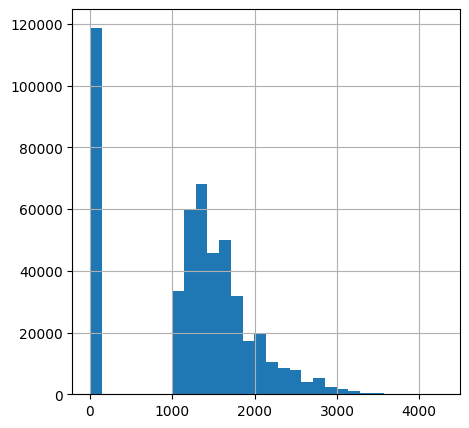

In [ ]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(5,5), bins=30);

In [ ]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [ ]:
if not df['time_since_first_review'].empty:
    bin_column('time_since_first_review',
               bins=[0, 182, 365, 730, 1460, max(df['time_since_first_review'])],
               labels=['0-6 months', '6-12 months', '1-2 years', '2-3 years', '4+ years'],
               na_label='no reviews')
else:
    # Handle the case when the 'time_since_first_review' column is empty
    print("The 'time_since_first_review' column is empty or contains no valid data.")

Last Review

In [ ]:
for col in ['Last Review']:
    df[col].fillna(datetime(2020,3,10), inplace=True)

In [ ]:
df['last_review'] = pd.to_datetime(df['Last Review']) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2020, 3, 10) - df['last_review']).astype('timedelta64[D]')

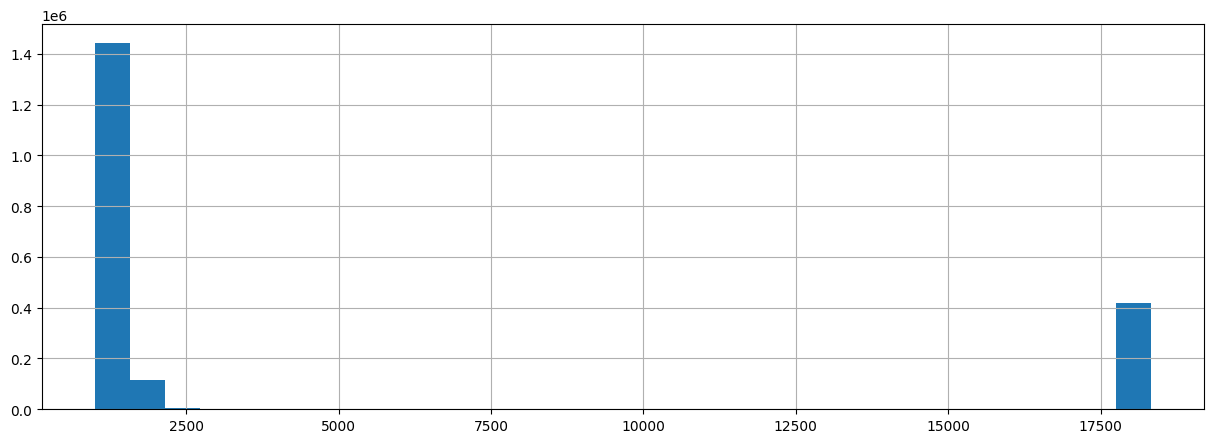

In [ ]:
# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [ ]:
if not df['time_since_last_review'].empty:
    bin_column('time_since_last_review',
               bins=[0, 14, 60, 182, 365, max(df['time_since_last_review'])],
               labels=['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1+ year'],
               na_label='no reviews')
else:
    # Handle the case when the 'time_since_last_review' column is empty
    print("The 'time_since_last_review' column is empty or contains no valid data.")

In [ ]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop(['last_review'], axis=1, inplace=True)

Review Ratings Columns

In [ ]:
df['Review Scores Rating'].value_counts()

0.0      124570
100.0     93000
93.0      24816
96.0      23466
95.0      22778
90.0      22501
97.0      22308
98.0      21741
80.0      19958
94.0      15909
92.0      13513
91.0      11571
99.0      10952
87.0       9286
89.0       8000
88.0       7992
85.0       5075
86.0       4006
84.0       3922
60.0       3402
83.0       3364
82.0       1780
70.0       1775
73.0       1257
81.0       1055
78.0       1037
75.0        959
77.0        915
76.0        874
40.0        795
79.0        712
20.0        601
67.0        524
72.0        399
74.0        380
50.0        305
71.0        240
68.0        231
65.0        179
69.0        156
64.0        112
53.0        107
66.0         79
63.0         73
47.0         57
55.0         38
30.0         37
57.0         35
62.0         25
56.0         23
52.0         12
48.0         10
61.0         10
58.0          8
33.0          7
59.0          7
54.0          7
45.0          6
49.0          6
44.0          5
27.0          5
43.0          5
51.0    

In [ ]:
df['Review Scores Accuracy'].value_counts()

10.0    239505
0.0     125461
9.0      91424
8.0      21870
7.0       3658
6.0       3180
4.0        852
2.0        601
5.0        398
3.0         46
Name: Review Scores Accuracy, dtype: int64

In [ ]:
df['Review Scores Cleanliness'].value_counts()

10.0    206074
0.0     125219
9.0     102559
8.0      35746
7.0       8257
6.0       5730
4.0       1411
2.0        951
5.0        931
3.0        117
Name: Review Scores Cleanliness, dtype: int64

In [ ]:
df['Review Scores Checkin'].value_counts()

10.0    280944
0.0     125771
9.0      61782
8.0      12843
7.0       2230
6.0       2154
2.0        524
4.0        509
5.0        210
3.0         28
Name: Review Scores Checkin, dtype: int64

In [ ]:
df['Review Scores Communication'].value_counts()

10.0    286865
0.0     125263
9.0      56881
8.0      12404
7.0       2259
6.0       2009
4.0        542
2.0        519
5.0        228
3.0         25
Name: Review Scores Communication, dtype: int64

In [ ]:
df['Review Scores Location'].value_counts()

10.0    218276
0.0     125720
9.0     107537
8.0      28030
7.0       3620
6.0       2906
4.0        433
2.0        229
5.0        224
3.0         20
Name: Review Scores Location, dtype: int64

In [ ]:
df['Review Scores Value'].value_counts()

10.0    181995
9.0     135750
0.0     125815
8.0      32457
7.0       4844
6.0       4131
4.0        873
2.0        640
5.0        442
3.0         48
Name: Review Scores Value, dtype: int64

In [ ]:
rating_null_count = df['Review Scores Rating'].isnull().sum()
print('Review Scores Rating Null Values:' + str(rating_null_count))
accuracy_null_count = df['Review Scores Accuracy'].isnull().sum()
print('Review Scores Accuracy Null Values:' + str(accuracy_null_count))
cleanliness_null_count = df['Review Scores Cleanliness'].isnull().sum()
print('Review Scores Cleanliness Null Values: ' + str(cleanliness_null_count))
checkin_null_count = df['Review Scores Checkin'].isnull().sum()
print('Review Scores Checkin Null Values:' + str(checkin_null_count))
communication_null_count = df['Review Scores Communication'].isnull().sum()
print('Review Scores Communication Null Values:' + str(communication_null_count))
location_null_count = df['Review Scores Location'].isnull().sum()
print('Review Scores Location Null Values: ' + str(location_null_count))
value_null_count = df['Review Scores Value'].isnull().sum()
print('Review Scores Value Null Values: ' + str(value_null_count))

Review Scores Rating Null Values:0
Review Scores Accuracy Null Values:0
Review Scores Cleanliness Null Values: 0
Review Scores Checkin Null Values:0
Review Scores Communication Null Values:0
Review Scores Location Null Values: 0
Review Scores Value Null Values: 0


In [ ]:
rating_average = df['Review Scores Rating'].mean()
print('Review Scores Rating Average:' + str(rating_average))
accuracy_average = df['Review Scores Accuracy'].mean()
print('Review Scores Accuracy Average:' + str(accuracy_average))
cleanliness_average = df['Review Scores Cleanliness'].mean()
print('Review Scores Cleanliness Average: ' + str(cleanliness_average))
checkin_average = df['Review Scores Checkin'].mean()
print('Review Scores Checkin Average:' + str(checkin_average))
communication_average = df['Review Scores Communication'].mean()
print('Review Scores Communication Average:' + str(communication_average))
location_average = df['Review Scores Location'].mean()
print('Review Scores Location Average: ' + str(location_average))
value_average = df['Review Scores Value'].mean()
print('Review Scores Value Average ' + str(value_average))

Review Scores Rating Average:69.13077136315567
Review Scores Accuracy Average:7.072454542654442
Review Scores Cleanliness Average: 6.9291676505918955
Review Scores Checkin Average:7.1889321245598
Review Scores Communication Average:7.211776301604739
Review Scores Location Average: 7.024669657799361
Review Scores Value Average 6.914190084087106


In [ ]:
rating_max = df['Review Scores Rating'].max()
print('Review Scores Rating Max:' + str(rating_max))
accuracy_max = df['Review Scores Accuracy'].max()
print('Review Scores Accuracy Max:' + str(accuracy_max))
cleanliness_max = df['Review Scores Cleanliness'].max()
print('Review Scores Cleanliness Max: ' + str(cleanliness_max))
checkin_max = df['Review Scores Checkin'].max()
print('Review Scores Checkin Max' + str(checkin_max))
communication_max = df['Review Scores Communication'].max()
print('Review Scores Communication Max:' + str(communication_max))
location_max = df['Review Scores Location'].max()
print('Review Scores Location Max: ' + str(location_max))
value_max = df['Review Scores Value'].max()
print('Review Scores Value Max ' + str(value_max))

Review Scores Rating Max:100.0
Review Scores Accuracy Max:10.0
Review Scores Cleanliness Max: 10.0
Review Scores Checkin Max10.0
Review Scores Communication Max:10.0
Review Scores Location Max: 10.0
Review Scores Value Max 10.0


In [ ]:
rating_min = df['Review Scores Rating'].min()
print('Review Scores Rating Min:' + str(rating_min))
accuracy_min = df['Review Scores Accuracy'].min()
print('Review Scores Accuracy Min:' + str(accuracy_min))
cleanliness_min = df['Review Scores Cleanliness'].min()
print('Review Scores Cleanliness Min: ' + str(cleanliness_min))
checkin_min = df['Review Scores Checkin'].min()
print('Review Scores Checkin Min' + str(checkin_min))
communication_min = df['Review Scores Communication'].min()
print('Review Scores Communication Min:' + str(communication_min))
location_min = df['Review Scores Location'].min()
print('Review Scores Location Min: ' + str(location_min))
value_min = df['Review Scores Value'].min()
print('Review Scores Value Min ' + str(value_min))

Review Scores Rating Min:0.0
Review Scores Accuracy Min:0.0
Review Scores Cleanliness Min: 0.0
Review Scores Checkin Min0.0
Review Scores Communication Min:0.0
Review Scores Location Min: 0.0
Review Scores Value Min 0.0


In [ ]:
replacement_values = {'Review Scores Rating' : 93,'Review Scores Accuracy' : 10, 'Review Scores Cleanliness' : 9, 'Review Scores Checkin' : 10, 'Review Scores Communication' : 10, 'Review Scores Location' : 9, 'Review Scores Value' : 9}

In [ ]:
df.fillna(replacement_values, inplace=True)

Cancellation Policy

In [ ]:
df['Cancellation Policy'].value_counts()

strict                 179528
flexible               153698
moderate               120438
moderate_new            11715
strict_new              10092
flexible_new             9393
super_strict_60          1192
super_strict_30           867
super_strict_30_new        41
super_strict_60_new        23
no_refunds                  6
long_term                   2
Name: Cancellation Policy, dtype: int64

Has Availability

In [ ]:
# Assuming df is your DataFrame and 'Has Availability' is the column name
df['Has Availability'] = df['Has Availability'].notnull().astype(int)


Host Response Rate

In [ ]:
print("Null values:", df['Host Response Rate'].isna().sum())
print(f"Proportion: {round((df['Host Response Rate'].isna().sum() / len(df)) * 100, 1)}%")

Null values: 112676
Proportion: 23.1%


In [ ]:
# Removing the % sign from the host_response_rate string and converting to an integer
df['host_response_rate'] = df['Host Response Rate'].apply(lambda x: float(str(x)[:-1]) if pd.notna(x) else x)

print("Mean Host Response Rate:", round(df['host_response_rate'].mean(), 0))
print("Median Host Response Rate:", df['host_response_rate'].median())
print(f"Proportion of 100% Host Response Rates: {round(((df['host_response_rate'] == 100.0).sum() / df['host_response_rate'].count()) * 100, 1)}%")


Mean Host Response Rate: 93.0
Median Host Response Rate: 100.0
Proportion of 100% Host Response Rates: 72.7%


In [ ]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       272205
unknown    112676
50-89%      52638
90-99%      32177
0-49%       17299
Name: host_response_rate, dtype: int64

In [ ]:
df.drop(['Host Response Rate'], axis=1, inplace=True)

Host Response Time

In [ ]:
print("Null values:", df['Host Response Time'].isna().sum())
print(f"Proportion: {round((df['Host Response Time'].isna().sum() / len(df)) * 100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[:, ['Host Response Time', 'First Review']].isnull().sum(axis=1) == 2])

Null values: 112676
Proportion: 23.1%


0

In [ ]:
df['Host Response Time'].fillna("unknown", inplace=True)
df['Host Response Time'].value_counts(normalize=True)

within an hour        0.403542
unknown               0.231370
within a few hours    0.195988
within a day          0.144036
a few days or more    0.025064
Name: Host Response Time, dtype: float64

In [ ]:
df['Host Response Time'].value_counts(normalize=True)

within an hour        0.403542
unknown               0.231370
within a few hours    0.195988
within a day          0.144036
a few days or more    0.025064
Name: Host Response Time, dtype: float64

Host Since

In [ ]:
# Converting to datetime
df['host_since'] = pd.to_datetime(df['Host Since'])

# Calculating the number of days
df['host_days_active'] = (datetime(2020, 3, 10) - df['host_since']).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(), 0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df['host_days_active'].fillna(df['host_days_active'].median(), inplace=True)


Mean days as host: 2050.0
Median days as host: 1982.0


In [ ]:
df.drop(['Host Since', 'host_since'], axis=1, inplace=True)

Host Listings Count

In [ ]:
# Ensure there are no spaces in the column name
print("Median number of listings per host:", int(df['Host Total Listings Count'].median()))
print("Mean number of listings per host:", int(round(df['Host Total Listings Count'].mean())))
percentage_single_listings = 100 * len(df[df['Host Total Listings Count'] == 1]) / len(df)
print(f"{int(round(percentage_single_listings))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 10
59% of listings are from hosts with one listing.


In [ ]:
# Assuming df is your DataFrame and 'Host Listings Count' is the column name
median_host_listings_count = df['Host Listings Count'].median()
df['Host Listings Count'].fillna(median_host_listings_count, inplace=True)


Host Total Listings Count

In [ ]:
# Assuming df is your DataFrame and 'Host Listings Count' is the column name
median_host_listings_count = df['Host Total Listings Count'].median()
df['Host Total Listings Count'].fillna(median_host_listings_count, inplace=True)

In [ ]:
df.isna().sum()

Experiences Offered                0
Host Response Time                 0
Host Listings Count                0
Host Total Listings Count          0
Street                             0
Neighbourhood Cleansed             0
City                               0
State                              5
Zipcode                           15
Market                             1
Smart Location                     0
Country Code                       0
Country                            0
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                          0
Bedrooms                           0
Beds                               0
Bed Type                           0
Price                              0
Security Deposit                   0
Cleaning Fee                       0
Guests Included                    0
Extra People                       0
M

In [ ]:
df.to_csv('Cleaned Final Project.csv', index=False)

In [ ]:
from google.colab import files
files.download('Cleaned Final Project.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Filtering Rows by Country

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from tqdm import tqdm


In [ ]:
df = pd.read_csv('Cleaned Final Project.csv')

Features Column

In [ ]:
unique_verifications = df['Features'].unique()
print(unique_verifications)

['Host Has Profile Pic, Host Identity Verified, Is Location Exact'
 'Host Is Superhost, Host Has Profile Pic, Host Identity Verified, Is Location Exact'
 'Host Has Profile Pic'
 'Host Is Superhost, Host Has Profile Pic, Host Identity Verified'
 'Host Is Superhost, Host Has Profile Pic'
 'Host Has Profile Pic, Host Identity Verified'
 'Host Has Profile Pic, Instant Bookable'
 'Host Is Superhost, Host Has Profile Pic, Is Location Exact'
 'Host Is Superhost, Host Has Profile Pic, Host Identity Verified, Instant Bookable'
 'Host Has Profile Pic, Is Location Exact'
 'Host Has Profile Pic, Host Identity Verified, Is Location Exact, Instant Bookable'
 'Host Is Superhost, Is Location Exact'
 'Host Has Profile Pic, Is Location Exact, Instant Bookable'
 'Host Is Superhost, Host Has Profile Pic, Host Identity Verified, Is Location Exact, Instant Bookable'
 'Host Has Profile Pic, Is Location Exact, Require Guest Phone Verification'
 'Host Has Profile Pic, Host Identity Verified, Instant Bookable'


In [ ]:
# Convert all values in the 'Host Verifications' column to strings
amenities_list = [str(x) for x in df['Features']]

# Create a string of all amenities
amenities_list_string = " ".join(amenities_list)

# Remove unnecessary characters and split into a set
amenities_list_string = amenities_list_string.replace('{', '').replace('}', ',').replace('"', '')
amenities_set = {x.strip() for x in amenities_list_string.split(',')}

# Now, amenities_set should contain all possible amenities as a set

In [ ]:
df['Superhost'] = df['Features'].str.contains('Host Is Superhost').fillna(False).astype(int)
df['Profile Pic'] = df['Features'].str.contains('Host Has Profile Pic').fillna(False).astype(int)
df['Host Identity'] = df['Features'].str.contains('Host Identity Verified').fillna(False).astype(int)
df['Guest Verification'] = df['Features'].str.contains('Require Guest Phone Verification|Require Guest Profile Picture').fillna(False).astype(int)
df['Location'] = df['Features'].str.contains('Is Location Exact').fillna(False).astype(int)
df['License'] = df['Features'].str.contains('Requires License').fillna(False).astype(int)
df['Bookable'] = df['Features'].str.contains('Instant Bookable').fillna(False).astype(int)


In [ ]:
# Dropping the original amenity feature
df.drop('Features', axis=1, inplace=True)

In [ ]:
# Filter rows for United Kingdom and France
selected_countries = ['United Kingdom', 'France']
df = df[df['Country'].isin(selected_countries)]

# Print the result
print(df)


       Experiences Offered  Host Response Time  Host Listings Count  \
492                   none  within a few hours                    2   
493                   none      within an hour                    1   
494                   none             unknown                    1   
495                   none             unknown                    1   
496                   none        within a day                    1   
...                    ...                 ...                  ...   
485930                none             unknown                    1   
485931                none             unknown                    1   
485932                none  within a few hours                    2   
485933                none  within a few hours                    2   
485934                none             unknown                    1   

        Host Total Listings Count  \
492                             2   
493                             1   
494                             1   

In [ ]:
df.isna().sum()

Experiences Offered          0
Host Response Time           0
Host Listings Count          0
Host Total Listings Count    0
Street                       0
                            ..
Profile Pic                  0
Host Identity                0
Guest Verification           0
Location                     0
Bookable                     0
Length: 80, dtype: int64

In [ ]:
df.to_csv('Filtered by Country Cleaned Final Project.csv', index=False)

In [ ]:
from google.colab import files
files.download('Filtered by Country Cleaned Final Project.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
cars = pd.read_csv('Filtered by Country Cleaned Final Project.csv')

In [ ]:
# Filter rows for United Kingdom and France
selected_countries = ['United Kingdom']
cars = cars[cars['Country'].isin(selected_countries)]

# Print the result
print(cars)

In [ ]:
# Filter rows for United Kingdom and France
selected_countries = ['France']
cars = cars[cars['Country'].isin(selected_countries)]

# Print the result
print(cars)

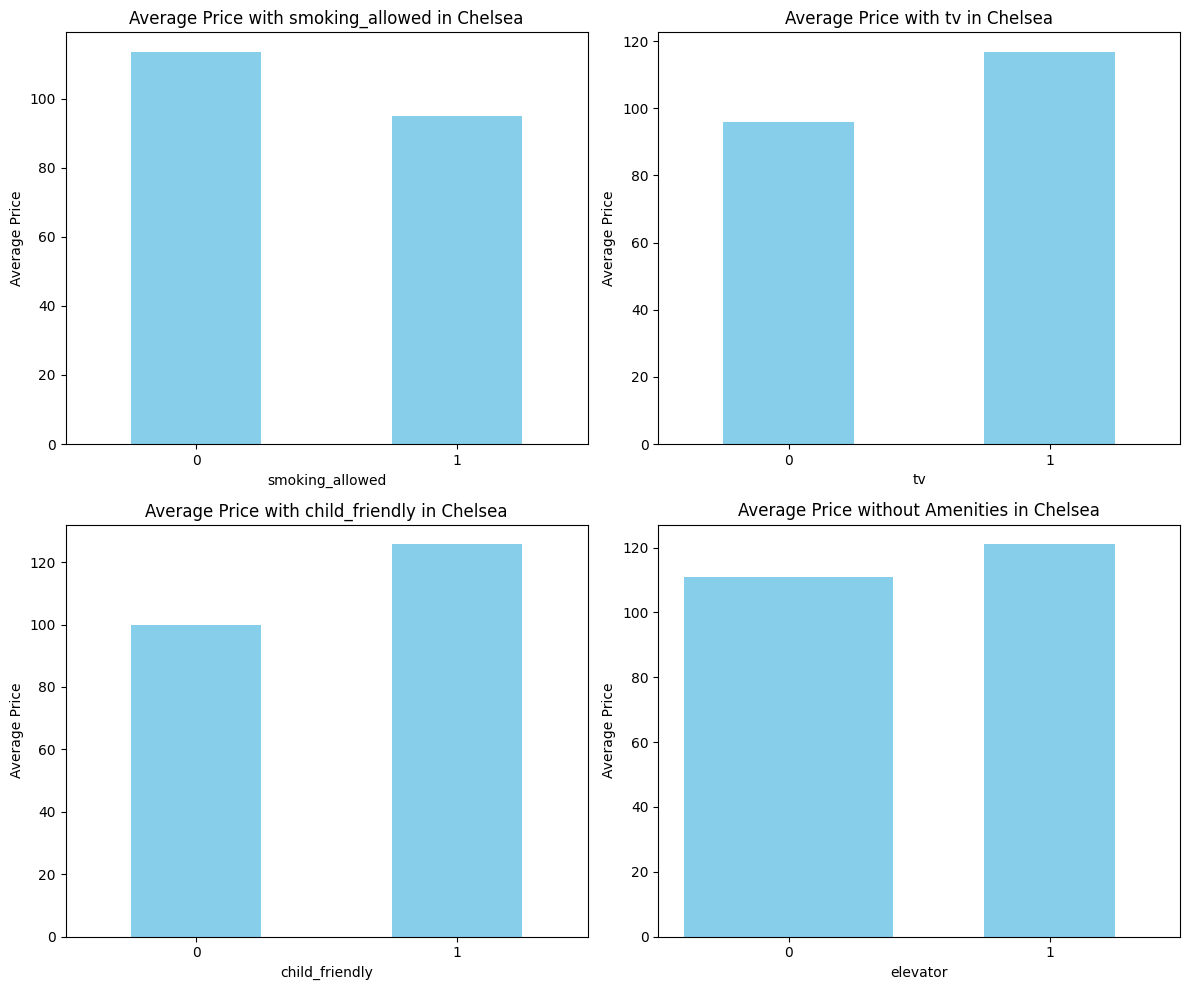

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cars' is your DataFrame
# If you haven't imported the data yet, you can do something like this:
# cars = pd.read_csv('your_dataset.csv')

# Specify the target zipcode
target_zipcode = 'Chelsea'

# List of amenity columns
amenity_columns = ['smoking_allowed', 'tv', 'child_friendly', 'elevator']

# Filter DataFrame for the specified zipcode
filtered_cars = cars[cars['City'] == target_zipcode]

# Calculate average price without any amenity within the specified zipcode
average_price_without_amenities = filtered_cars['Price'].mean()

# Calculate average price for each amenity within the specified zipcode
average_prices_with_amenities = {}
for amenity in amenity_columns:
    group = filtered_cars.groupby(amenity)['Price'].mean()
    average_prices_with_amenities[amenity] = group

# Plotting the bar chart
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Adjust the figure size if needed

for i, amenity in enumerate(amenity_columns):
    row, col = divmod(i, 2)
    average_prices_with_amenities[amenity].plot(kind='bar', color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Average Price with {amenity} in {target_zipcode}')
    axes[row, col].set_xlabel(amenity)
    axes[row, col].set_ylabel('Average Price')
    axes[row, col].tick_params(axis='x', rotation=0)

# Plot average price without any amenity within the specified zipcode
axes[1, 1].bar(['Without Amenities'], [average_price_without_amenities], color='skyblue')
axes[1, 1].set_title(f'Average Price without Amenities in {target_zipcode}')
axes[1, 1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()


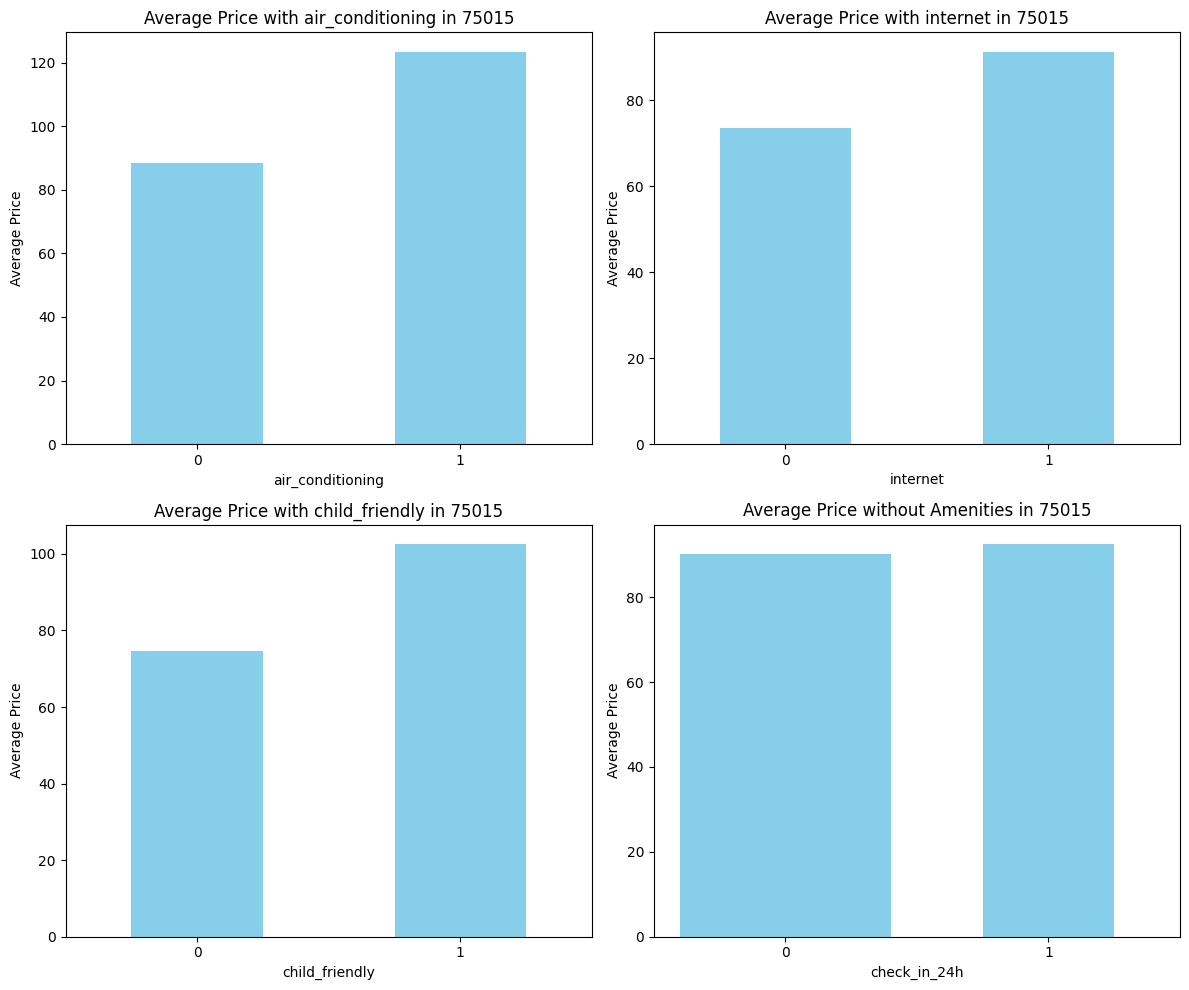

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cars' is your DataFrame
# If you haven't imported the data yet, you can do something like this:
# cars = pd.read_csv('your_dataset.csv')

# Specify the target zipcode
target_zipcode = '75015'

# List of amenity columns
amenity_columns = ['air_conditioning', 'internet', 'child_friendly', 'check_in_24h']

# Filter DataFrame for the specified zipcode
filtered_cars = cars[cars['Zipcode'] == target_zipcode]

# Calculate average price without any amenity within the specified zipcode
average_price_without_amenities = filtered_cars['Price'].mean()

# Calculate average price for each amenity within the specified zipcode
average_prices_with_amenities = {}
for amenity in amenity_columns:
    group = filtered_cars.groupby(amenity)['Price'].mean()
    average_prices_with_amenities[amenity] = group

# Plotting the bar chart
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Adjust the figure size if needed

for i, amenity in enumerate(amenity_columns):
    row, col = divmod(i, 2)
    average_prices_with_amenities[amenity].plot(kind='bar', color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Average Price with {amenity} in {target_zipcode}')
    axes[row, col].set_xlabel(amenity)
    axes[row, col].set_ylabel('Average Price')
    axes[row, col].tick_params(axis='x', rotation=0)

# Plot average price without any amenity within the specified zipcode
axes[1, 1].bar(['Without Amenities'], [average_price_without_amenities], color='skyblue')
axes[1, 1].set_title(f'Average Price without Amenities in {target_zipcode}')
axes[1, 1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

<ipython-input-15-6edbcc1c5c5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['Year'] = data_to_plot['host_since'].dt.year  # Extract the year
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


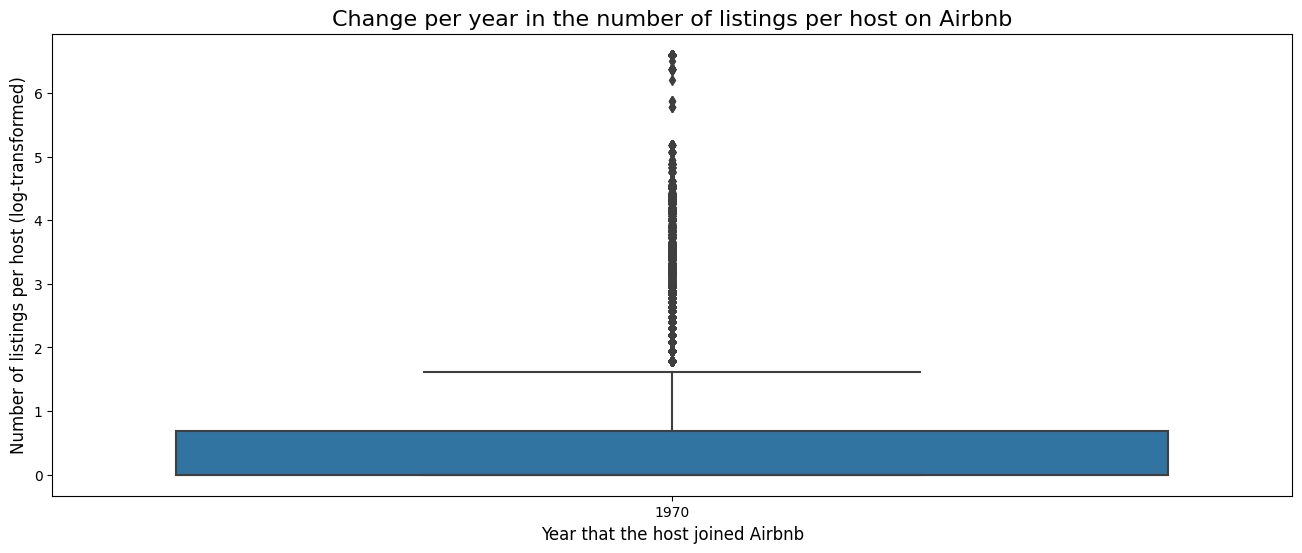

In [ ]:
# Create a DataFrame with the columns to be plotted
data_to_plot = df[['host_since', 'Host Total Listings Count']]
data_to_plot['Year'] = data_to_plot['host_since'].dt.year  # Extract the year

plt.figure(figsize=(16, 6))
sns.boxplot(x='Year', y=np.log(data_to_plot['Host Total Listings Count']), data=data_to_plot)

plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb', fontsize=16)
plt.show()

In [ ]:
# Ensure there are no spaces in the column name
average_listings_per_year = df.set_index('host_since')['Host Total Listings Count'].resample('Y').mean().round(2)

print("Average number of listings per host per year on Airbnb")
print(average_listings_per_year)

Average number of listings per host per year on Airbnb
host_since
1970-12-31    9.86
Freq: A-DEC, Name: Host Total Listings Count, dtype: float64


In [ ]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('Host Total Listings Count').drop_duplicates('Host Total Listings Count',keep='last').tail(10)[['host_since', 'Host Total Listings Count']]

host_since  \
host_since                                                    
1970-01-01 00:00:00.000002856 1970-01-01 00:00:00.000002856   
1970-01-01 00:00:00.000002192 1970-01-01 00:00:00.000002192   
1970-01-01 00:00:00.000002423 1970-01-01 00:00:00.000002423   
1970-01-01 00:00:00.000001781 1970-01-01 00:00:00.000001781   
1970-01-01 00:00:00.000001912 1970-01-01 00:00:00.000001912   
1970-01-01 00:00:00.000002216 1970-01-01 00:00:00.000002216   
1970-01-01 00:00:00.000002583 1970-01-01 00:00:00.000002583   
1970-01-01 00:00:00.000002583 1970-01-01 00:00:00.000002583   
1970-01-01 00:00:00.000001580 1970-01-01 00:00:00.000001580   
1970-01-01 00:00:00.000001755 1970-01-01 00:00:00.000001755   

                               Host Total Listings Count  
host_since                                                
1970-01-01 00:00:00.000002856                        141  
1970-01-01 00:00:00.000002192                        159  
1970-01-01 00:00:00.000002423                        177  
1970-01-01 00:00:00.000001781                        322  
1970-01-01 00:00:00.000001912                        357  
1970-01-01 00:00:00.000002216                        494  
1970-01-01 00:00:00.000002583                        575  
1970-01-01 00:00:00.000002583                        585  
1970-01-01 00:00:00.000001580                        661  
1970-01-01 00:00:00.000001755                        735

<ipython-input-18-305b2ad9677b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['Year'] = data_to_plot['first_review'].dt.year  # Extract the year
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


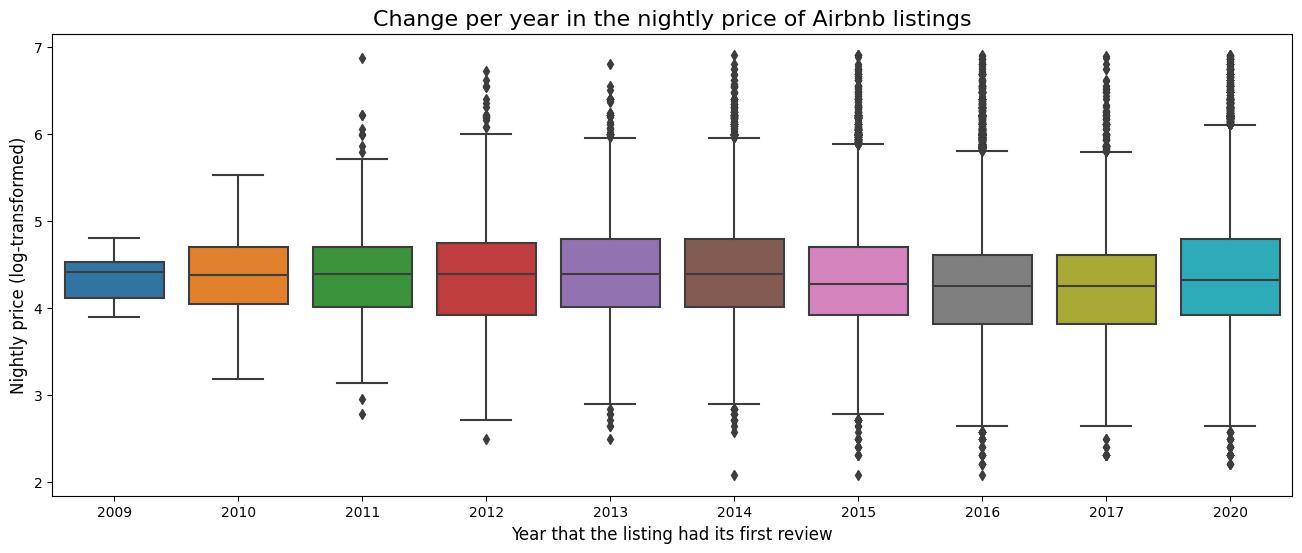

In [ ]:
plt.figure(figsize=(16, 6))

# Create a DataFrame with the columns to be plotted
data_to_plot = df[['first_review', 'Price']]
data_to_plot['Year'] = data_to_plot['first_review'].dt.year  # Extract the year

sns.boxplot(x='Year', y=np.log(data_to_plot['Price']), data=data_to_plot)

plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings', fontsize=16)
plt.show()


In [ ]:
print("Mean nightly price of listings in each year on Airbnb:")
print(round(df.set_index('first_review').Price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb:
first_review
2009-01-01     79.80
2010-01-01     86.57
2011-01-01     94.75
2012-01-01     95.63
2013-01-01     99.33
2014-01-01     98.14
2015-01-01     91.56
2016-01-01     88.64
2017-01-01     85.51
2018-01-01       NaN
2019-01-01       NaN
2020-01-01    100.57
Freq: AS-JAN, Name: Price, dtype: float64


In [ ]:
# Dropping host_since and first_review as they are no longer needed
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

Numerical Features

In [ ]:
df.describe()

Host Listings Count  Host Total Listings Count       Latitude  \
count        117471.000000              117471.000000  117471.000000   
mean              9.861268                   9.861268      50.487644   
std              59.357547                  59.357547       1.846072   
min               0.000000                   0.000000      46.137407   
25%               1.000000                   1.000000      48.865621   
50%               1.000000                   1.000000      51.422896   
75%               2.000000                   2.000000      51.522038   
max             735.000000                 735.000000      55.994889   

           Longitude   Accommodates      Bathrooms       Bedrooms  \
count  117471.000000  117471.000000  117471.000000  117471.000000   
mean        0.883855       3.053026       1.177082       1.214845   
std         1.569718       1.724729       0.472824       0.831459   
min        -3.441791       1.000000       0.000000       0.000000   
25%        -0.139599       2.000000       1.000000       1.000000   
50%         0.013930       2.000000       1.000000       1.000000   
75%         2.346730       4.000000       1.000000       1.000000   
max         6.249347      16.000000       8.000000      10.000000   

                Beds          Price  Security Deposit  ...   pets_allowed  \
count  117471.000000  117471.000000     117471.000000  ...  117471.000000   
mean        1.707638      93.699262          0.688476  ...       0.135233   
std         1.149989      76.717339          1.845881  ...       0.341974   
min         0.000000       0.000000          0.000000  ...       0.000000   
25%         1.000000      50.000000          0.000000  ...       0.000000   
50%         1.000000      74.000000          0.000000  ...       0.000000   
75%         2.000000     110.000000          0.000000  ...       0.000000   
max        16.000000     999.000000          9.000000  ...       1.000000   

              secure  smoking_allowed  host_days_active      Superhost  \
count  117471.000000    117471.000000     117471.000000  117471.000000   
mean        0.127376         0.135284       2053.464898       0.071592   
std         0.333395         0.342029        560.621179       0.257812   
min         0.000000         0.000000       1071.000000       0.000000   
25%         0.000000         0.000000       1625.000000       0.000000   
50%         0.000000         0.000000       2000.000000       0.000000   
75%         0.000000         0.000000       2444.000000       0.000000   
max         1.000000         1.000000       4226.000000       1.000000   

         Profile Pic  Host Identity  Guest Verification       Location  \
count  117471.000000  117471.000000       117471.000000  117471.000000   
mean        0.995914       0.571630            0.030322       0.748772   
std         0.063792       0.494845            0.171474       0.433721   
min         0.000000       0.000000            0.000000       0.000000   
25%         1.000000       0.000000            0.000000       0.000000   
50%         1.000000       1.000000            0.000000       1.000000   
75%         1.000000       1.000000            0.000000       1.000000   
max         1.000000       1.000000            1.000000       1.000000   

            Bookable  
count  117471.000000  
mean        0.218190  
std         0.413019  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 58 columns]

Price

In [ ]:
print(f"Nightly advertised prices range from ${min(df.Price)} to ${max(df.Price)}.")

Nightly advertised prices range from $0 to $999.


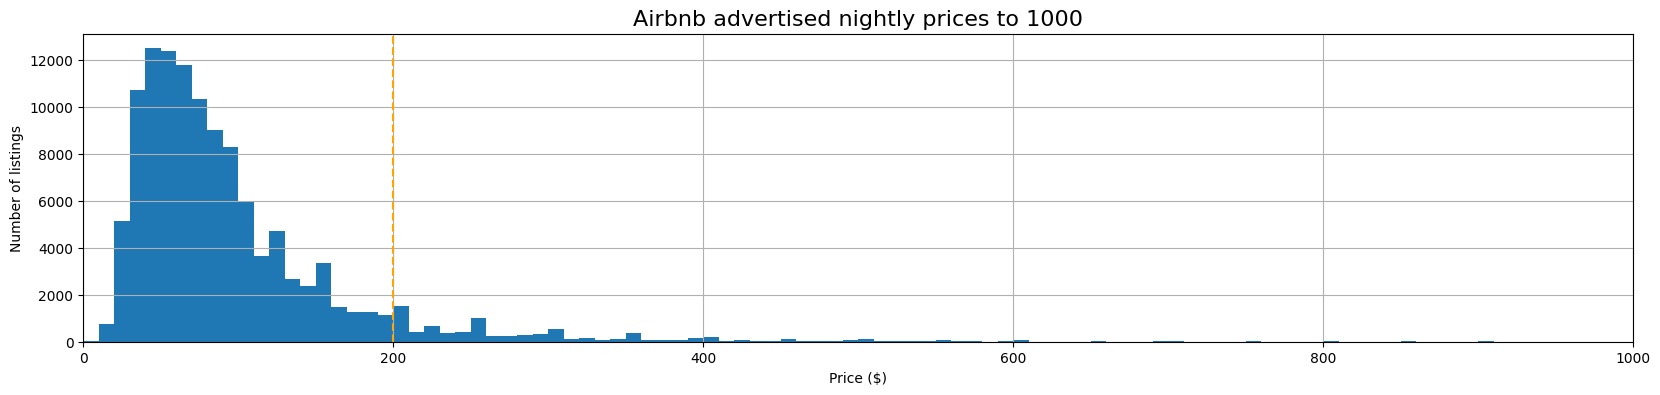

In [ ]:
# Distribution of prices from 0 to 1000
plt.figure(figsize=(20,4))
df.Price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices to 1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

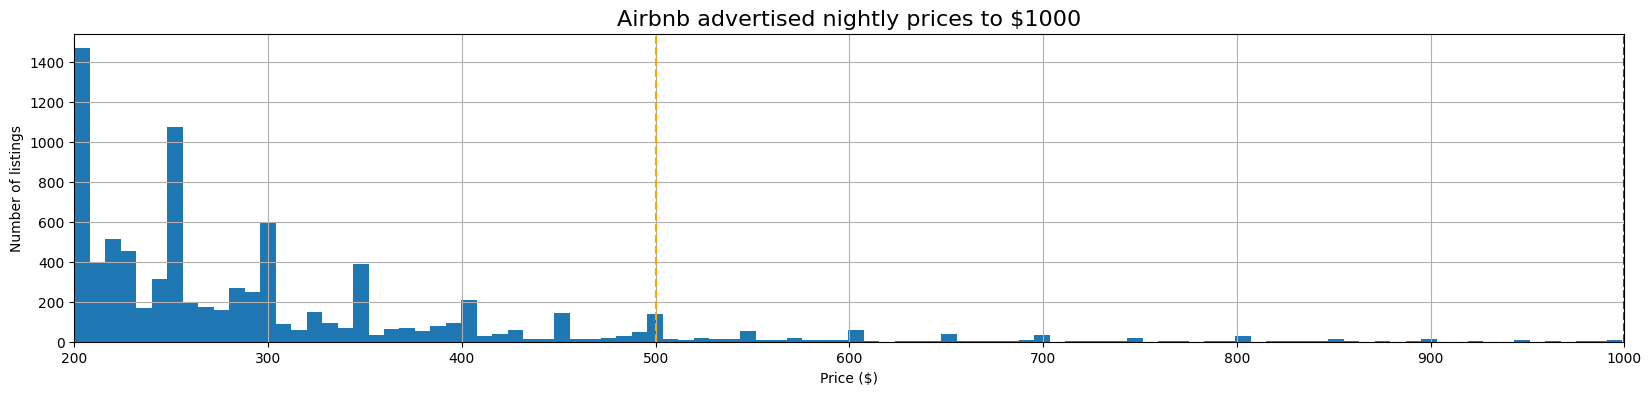

In [ ]:
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
df.Price.hist(bins=100, range=(200, max(df.Price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [ ]:
# Replacing values under $10 with $10
df.loc[df.Price <= 10, 'Price'] = 10

# Replacing values over $1000 with $1000
df.loc[df.Price >= 1000, 'Price'] = 1000

Host Listings Count

In [ ]:
# Ensure there are no spaces in the column name
print("Median number of listings per host:", int(df['Host Total Listings Count'].median()))
print("Mean number of listings per host:", int(round(df['Host Total Listings Count'].mean())))
percentage_single_listings = 100 * len(df[df['Host Total Listings Count'] == 1]) / len(df)
print(f"{int(round(percentage_single_listings))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 10
64% of listings are from hosts with one listing.


Number of People accommodated, bathrooms, bedrooms and beds

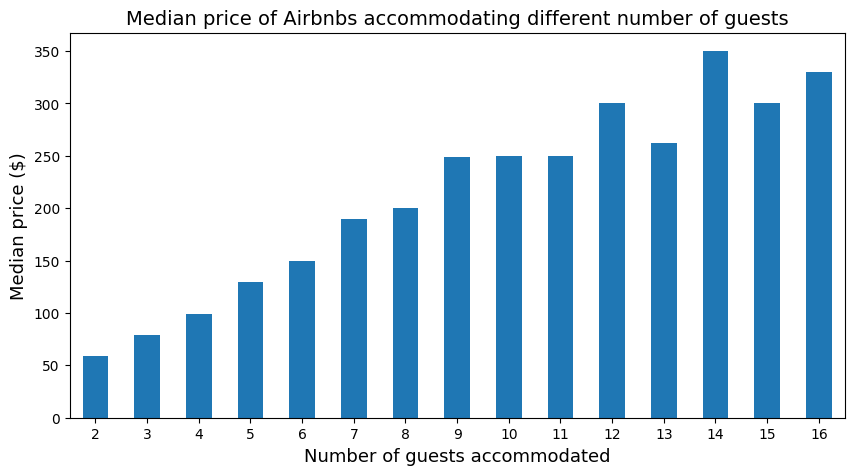

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('Accommodates').Price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

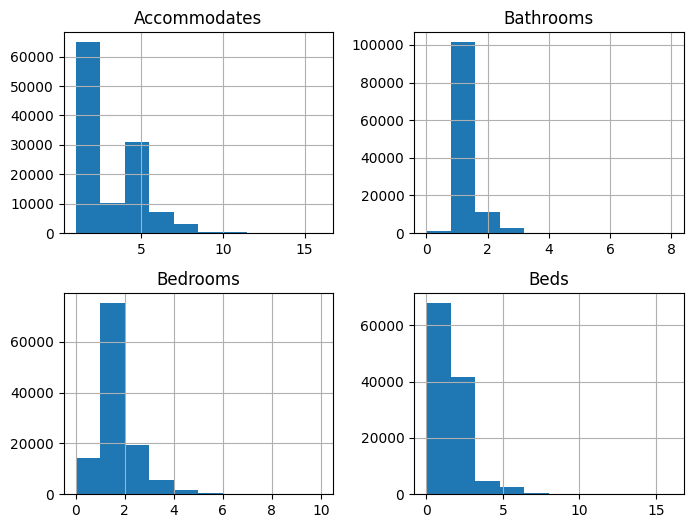

In [ ]:
df[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds']].hist(figsize=(8,6));

Categorical Features

Property and Room Types

In [ ]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

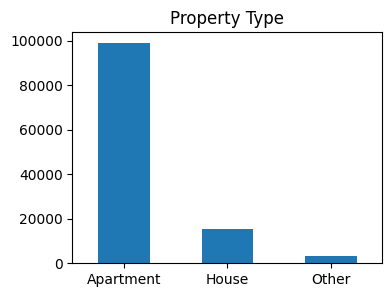

Apartment    0.841791
House        0.129930
Other        0.028279
Name: Property Type, dtype: float64


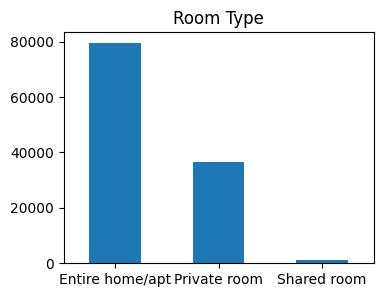

Entire home/apt    0.675877
Private room       0.312579
Shared room        0.011543
Name: Room Type, dtype: float64


In [ ]:
for col in ['Property Type', 'Room Type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

Reviews

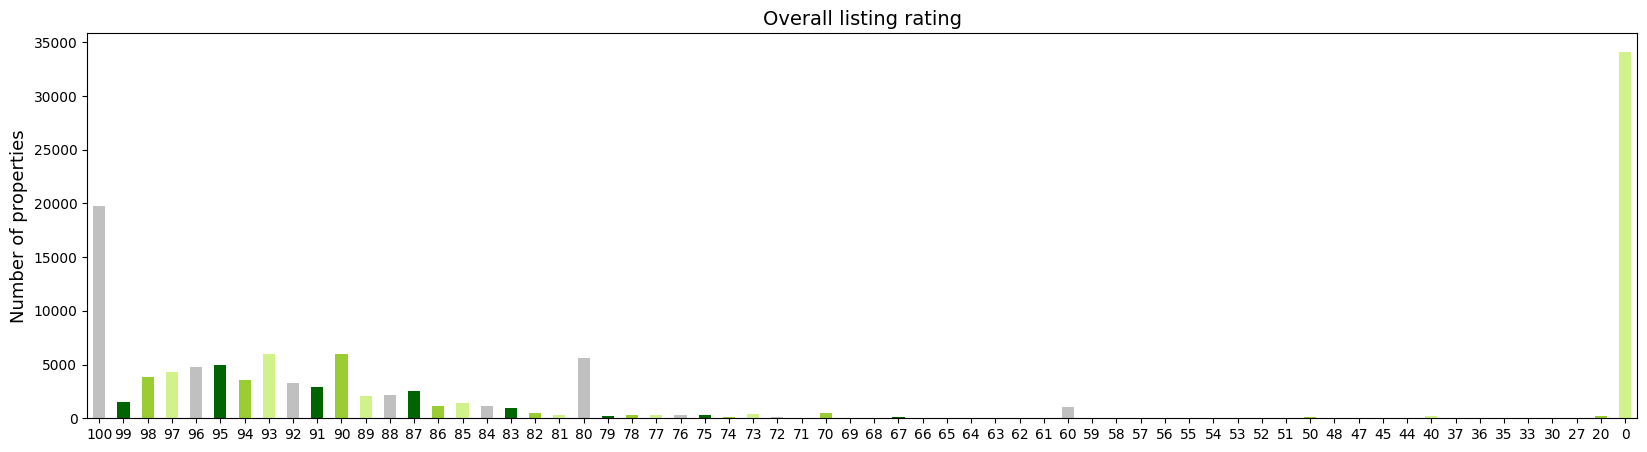

In [ ]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('Overall listing rating', fontsize=14)

# Use the unique values in the 'Review Scores Rating' column as labels
unique_labels = df['Review Scores Rating'].unique()
unique_labels = np.sort(unique_labels)[::-1]  # Sort in descending order

# Plot the value counts based on unique values
df['Review Scores Rating'].value_counts().loc[unique_labels].plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a'], ax=ax)

ax.set_xticklabels(labels=unique_labels, rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

In [ ]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

First and Last Reviews

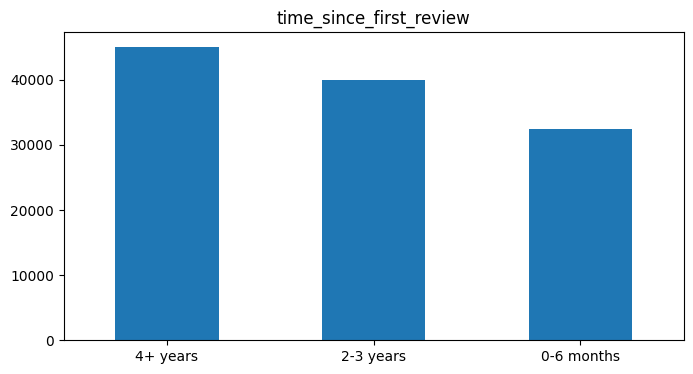

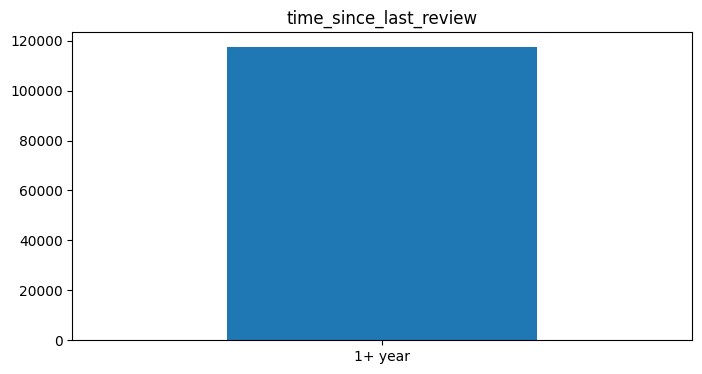

In [ ]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

Heatmap and Correlation

<ipython-input-36-095dc2818a93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


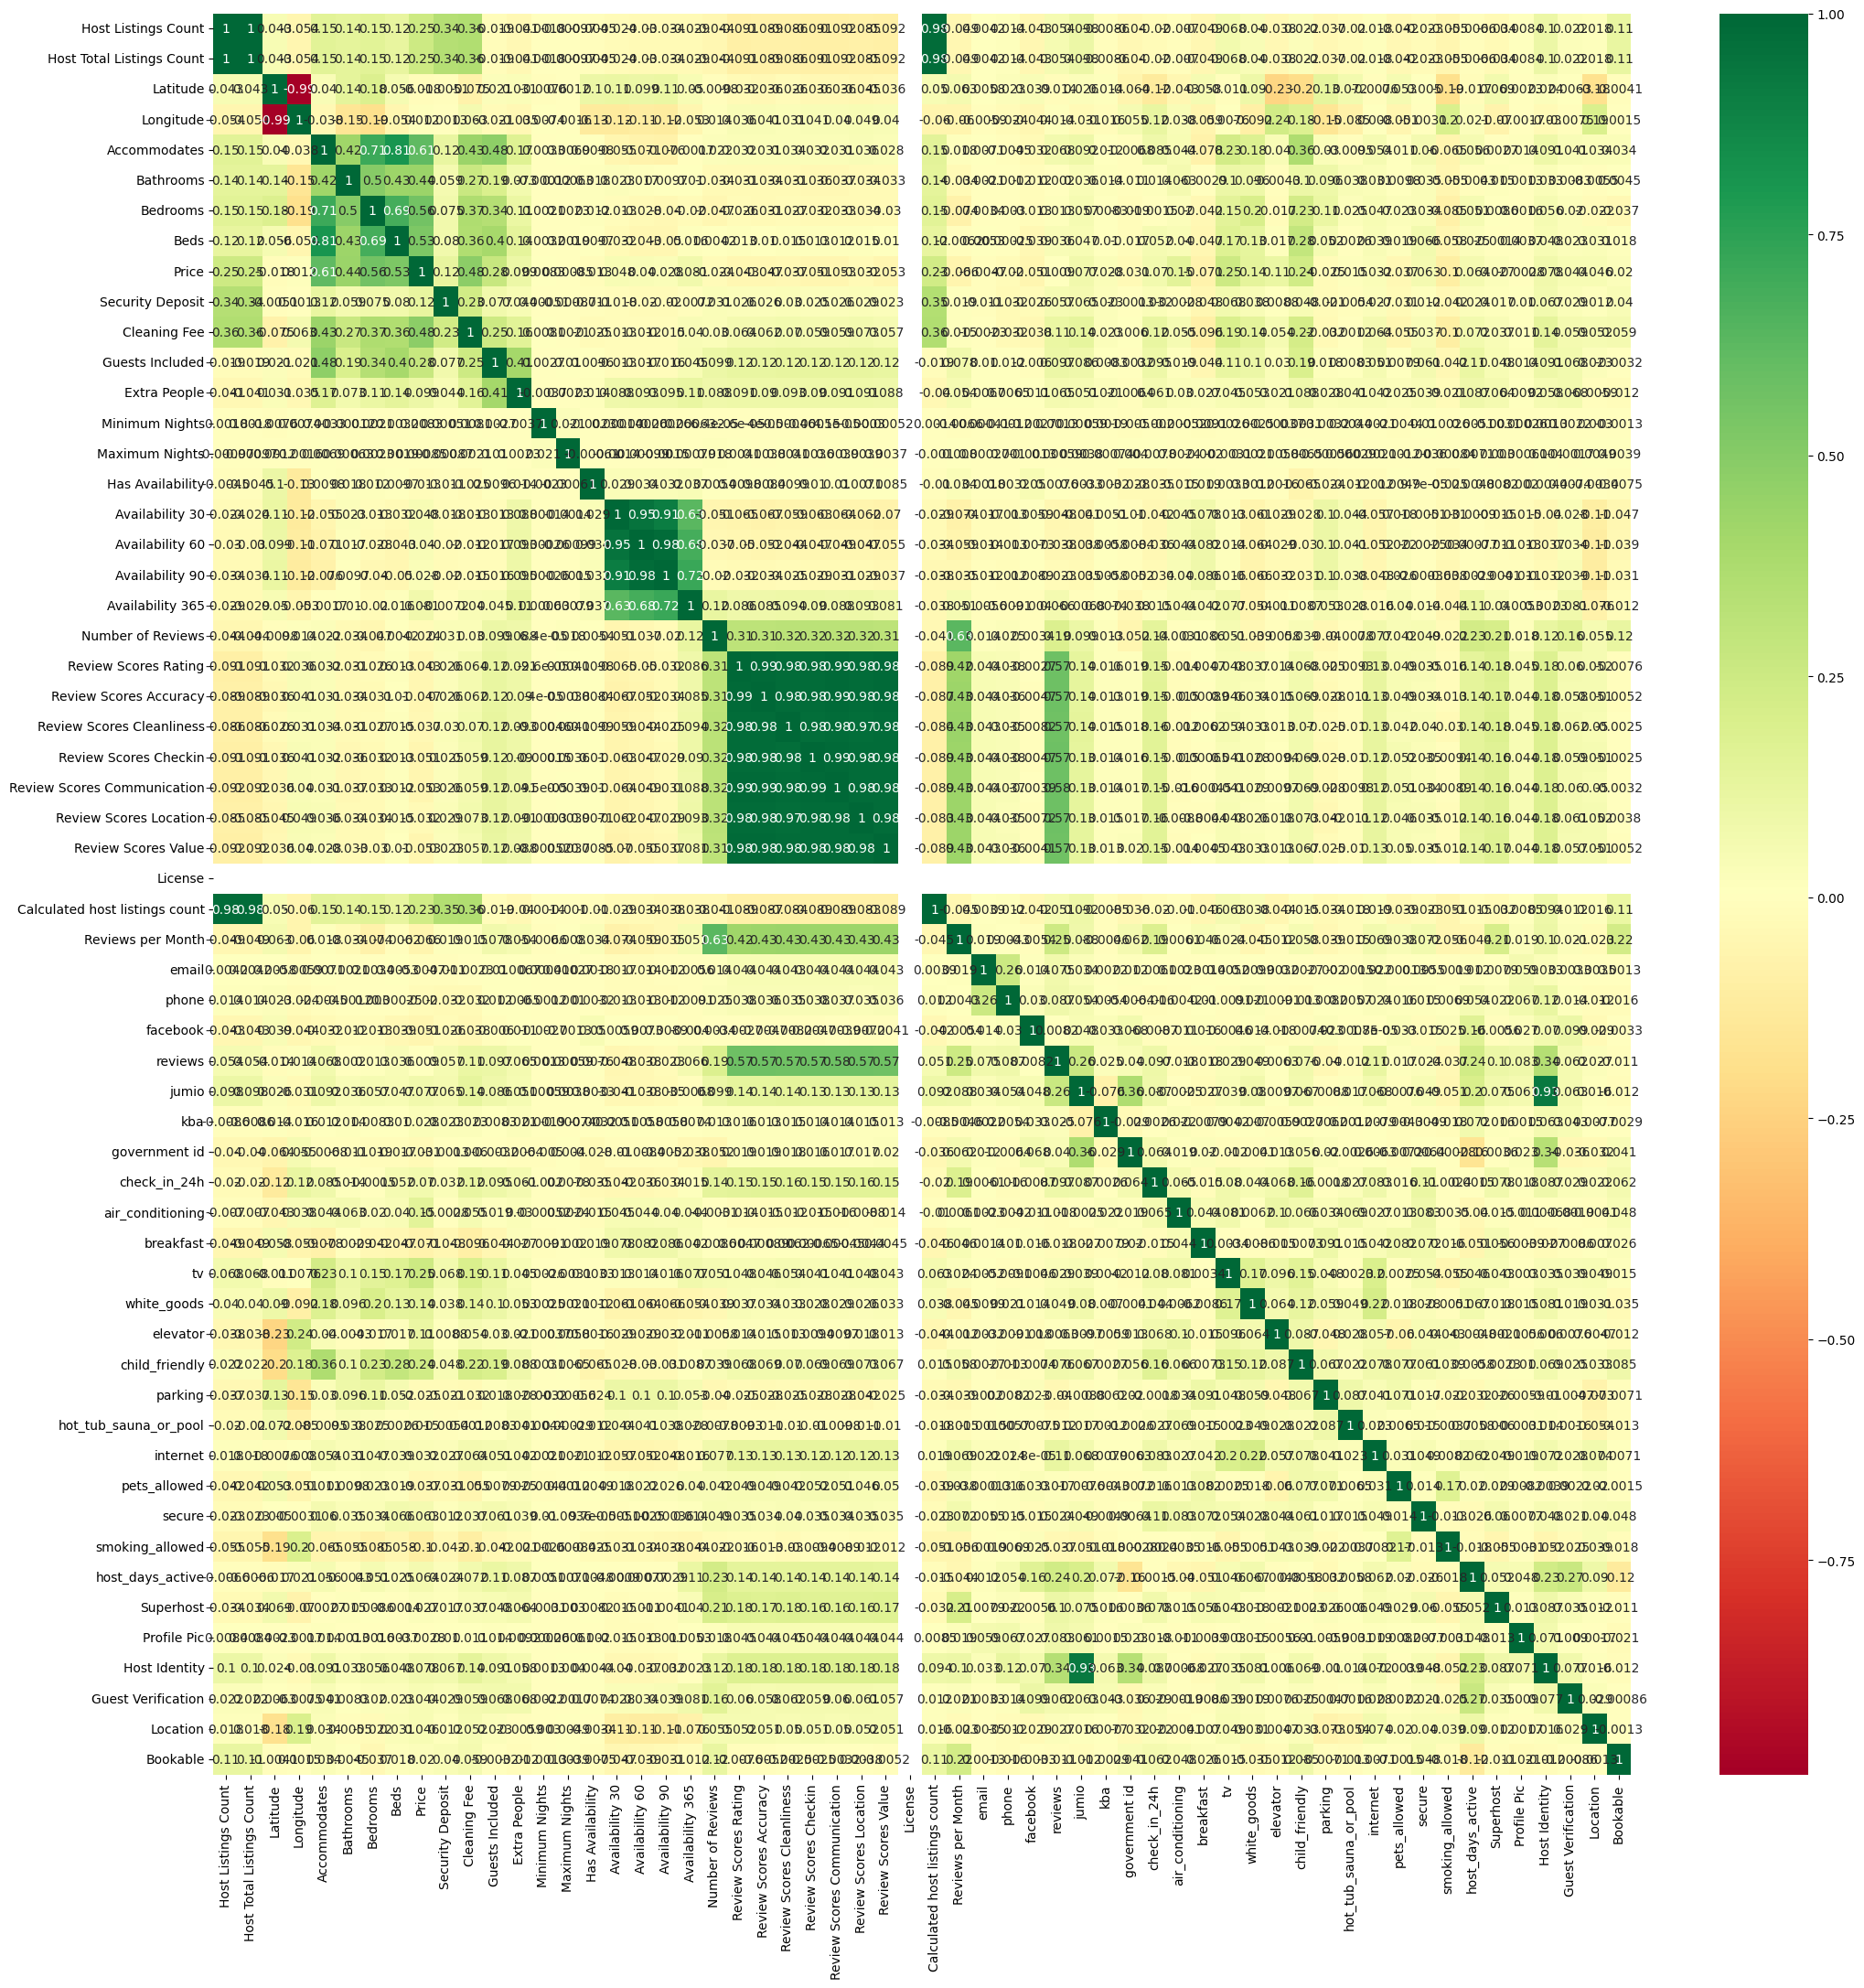

In [ ]:
corrmat=df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(df[top_corr_feature].corr(), annot=True,cmap="RdYlGn")

<ipython-input-37-025937fb8dff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numcorr = df.corr()


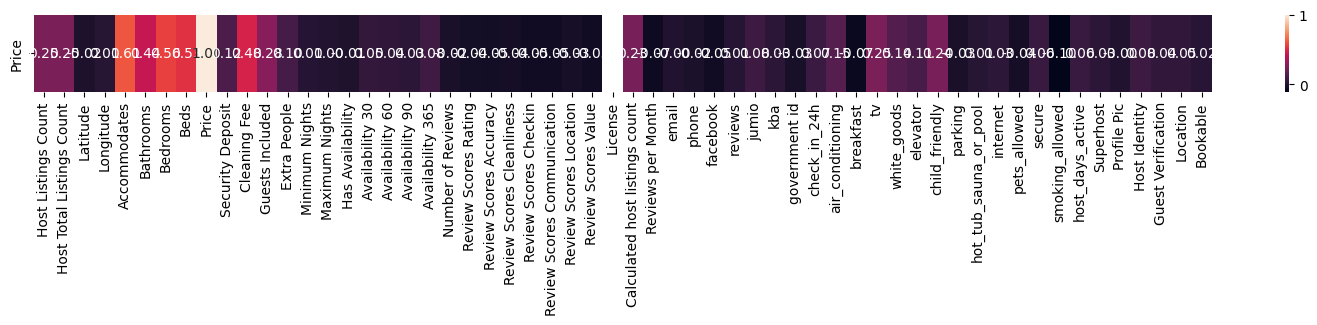

In [ ]:
num = df.select_dtypes(exclude = 'object')
numcorr = df.corr()
f, ax = plt.subplots(figsize = (19,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'Price', ascending = False).head(1), annot = True, fmt = ".2f")
plt.show()

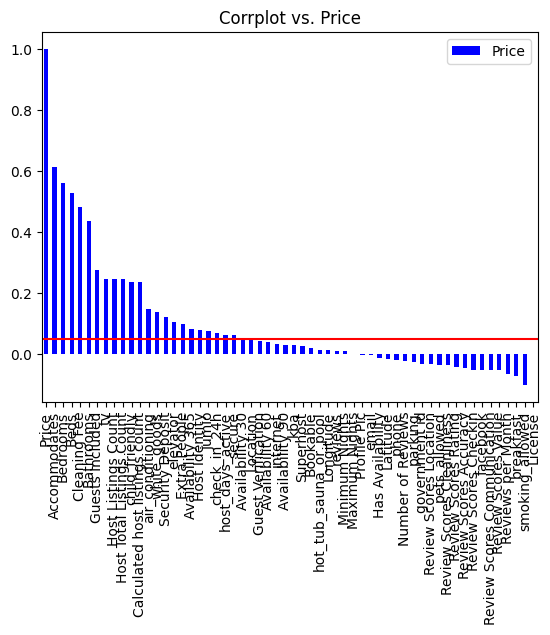

In [ ]:
numcorr['Price'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.05, color = 'r', linestyle = '-')
plt.title('Corrplot vs. Price')
plt.show()

Numerical Columns

In [ ]:
numerical_columns = ['Accommodates', 'Availability 90', 'Bathrooms', 'Cleaning Fee', 'Extra People', 'host_days_active', 'Host Total Listings Count', 'Maximum Nights', 'Minimum Nights', 'Number of Reviews', 'Price', 'Security Deposit']

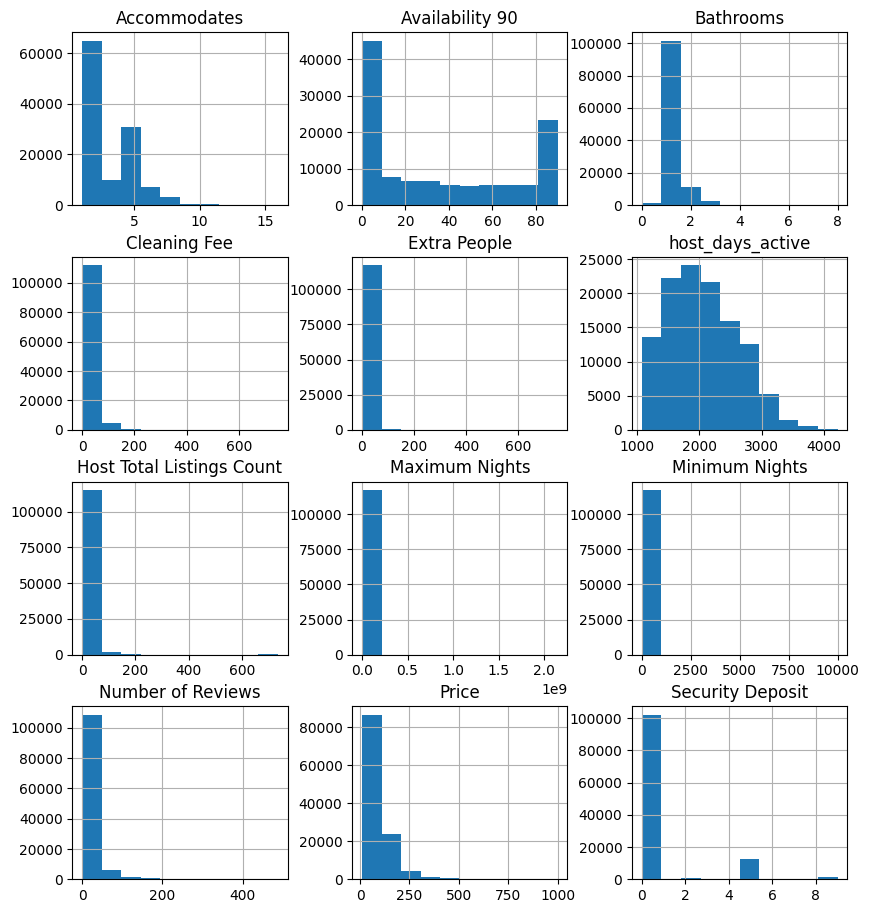

In [ ]:
df[numerical_columns].hist(figsize=(10,11));

Review Scores

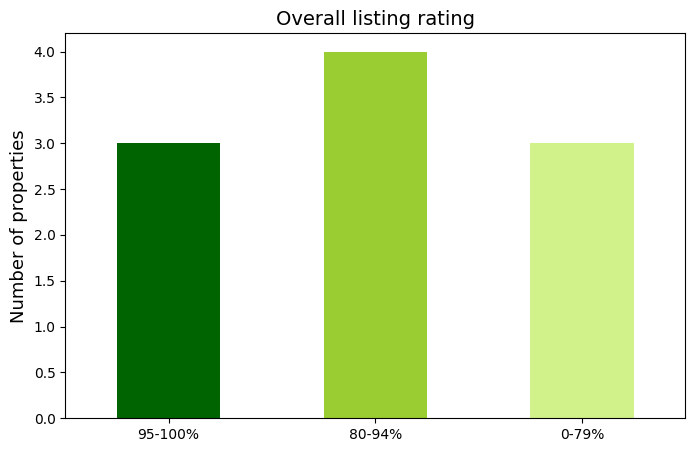

In [ ]:
# Create a DataFrame for demonstration
data = {
    'Review Scores Rating': [97, 80, 92, 88, 100, 78, 95, 0, 85, 75]
}
df = pd.DataFrame(data)

# Define the categories (excluding 'no reviews')
categories = ['95-100%', '80-94%', '0-79%']

# Create a new column with category labels based on 'Review Scores Rating'
df['Rating Category'] = pd.cut(
    df['Review Scores Rating'],
    bins=[-1, 79, 94, 100],  # Adjusted bin edges to exclude 'no reviews'
    labels=categories
)

# Count the values in each category
value_counts = df['Rating Category'].value_counts().sort_index(ascending=False)

# Create the bar plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Overall listing rating', fontsize=14)
value_counts.plot(kind='bar', color=['darkgreen', 'yellowgreen', '#d1f28a'], ax=ax)
ax.set_xticklabels(labels=categories, rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

Feature Engineering for France

One-hot Encoding France

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from tqdm import tqdm

In [ ]:
cars = pd.read_csv('Filtered by Country Cleaned Final Project.csv')

In [ ]:
# Filter rows for United Kingdom and France
selected_countries = ['France']
cars = cars[cars['Country'].isin(selected_countries)]

# Print the result
print(cars)

In [ ]:
#split the dependent variable and independent variable
cars_X =  cars.copy()
cars_X.drop(['Price'],axis=1,inplace=True)
cars_y = cars['Price']

In [ ]:
cars_x= cars_X.iloc[:,:].values

In [ ]:
type(cars_x)

numpy.ndarray

In [ ]:
cars.head(1)

In [ ]:
list(cars_x[1,:])

In [ ]:
list(cars_x[1,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,0,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]])

In [ ]:
#list all the categorical variables
columns_ohe = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,0,44,45,46,47,48,49,50,51,52,53,54,55,56]

In [ ]:
for num in tqdm(columns_ohe):
    dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
    if(num!=1):
        dummy = np.concatenate((dummy,dummy_),axis=1)
    else:
        dummy = dummy_

  0%|          | 0/57 [00:00<?, ?it/s]<ipython-input-11-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
  9%|▉         | 5/57 [00:00<00:02, 24.79it/s]<ipython-input-11-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
 14%|█▍        | 8/57 [00:00<00:01, 24.98it/s]<ipython-input-11-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
<ipython-input-11-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequence

In [ ]:
list(cars_x[1,:])

['within an hour',
 1,
 'Paris',
 'Île-de-France',
 'FR',
 'France',
 'Apartment',
 'Entire home/apt',
 2,
 1.0,
 0,
 1,
 'Real Bed',
 0,
 10,
 1,
 0,
 1,
 1125,
 28,
 52,
 82,
 357,
 19,
 94,
 'moderate',
 0.98,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 '4+ years',
 '1+ year',
 '100%',
 1734,
 0,
 1,
 0,
 0,
 1,
 0]

In [ ]:
cars_x = np.delete(cars_x,columns_ohe,1)

In [ ]:
cars_x = np.concatenate((cars_x,dummy),axis=1)

In [ ]:
list(cars_x[1,:])

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Data Splitting France

In [ ]:
import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(0)

# Assuming cars_x is your independent variable and cars_y is your dependent variable
number_of_samples = len(cars_x)

# Shuffle indices randomly
random_indices = np.random.permutation(number_of_samples)

# Calculate the number of training samples (75% of the total samples)
num_training_samples = int(number_of_samples * 0.75)

# Split the data into training and validation sets using the shuffled indices
cars_x_train = cars_x[random_indices[:num_training_samples]]
cars_y_train = cars_y.iloc[random_indices[:num_training_samples]].reset_index(drop=True)

cars_x_validation = cars_x[random_indices[num_training_samples:]]
cars_y_validation = cars_y.iloc[random_indices[num_training_samples:]].reset_index(drop=True)

# Create a copy of the original dataset for independent variable (features)
cars_X = cars.copy()
cars_X.drop(['Price'], axis=1, inplace=True)

# Dependent variable (target)
cars_y = cars['Price']

In [ ]:
len(cars_x_train)

42378

In [ ]:
len(cars_y_train)

42378

In [ ]:
len(cars_x_validation)

14127

In [ ]:
len(cars_y_validation)

14127

Standard Scaling France

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Process the dataset in batches of 1000 rows.
batch_size = 100
for i in range(0, len(cars_x_train), batch_size):
    batch = cars_x_train[i:i+batch_size]
    scaler.partial_fit(batch)

# Apply transform to both the training set and the test set.
cars_x_train = scaler.transform(cars_x_train)
cars_x_validation = scaler.transform(cars_x_validation)







In [ ]:
cars_x_train.shape

(42378, 5361)

In [ ]:
cars_x_validation.shape

(14127, 5361)

Principal Component Analysis France

In [ ]:
from sklearn.decomposition import IncrementalPCA

# Make an instance of the Model
pca = IncrementalPCA(n_components=None, batch_size=100)

# Fit on training set only.
for i in range(0, len(cars_x_train), batch_size):
    batch = cars_x_train[i:i+batch_size]
    pca.partial_fit(batch)

# Apply transform to both the training set and the test set.
cars_x_train = pca.transform(cars_x_train)
cars_x_validation = pca.transform(cars_x_validation)



In [ ]:
cars_x_train.shape

(42378, 100)

In [ ]:
cars_x_validation.shape

(14127, 100)

In [ ]:
R2_train = []
R2_test = []

Linear Regression France

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(cars_x_train, cars_y_train)
cars_linear_train_predicted = model.predict(cars_x_train)
cars_linear_validation_predicted = model.predict(cars_x_validation)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_train_score = r2_score(cars_y_train, cars_linear_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_linear_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 2729.65
Validation data - Mean squared error: 2369.64
Training data R2 Score: 0.50
Validation data R2 Score: 0.52


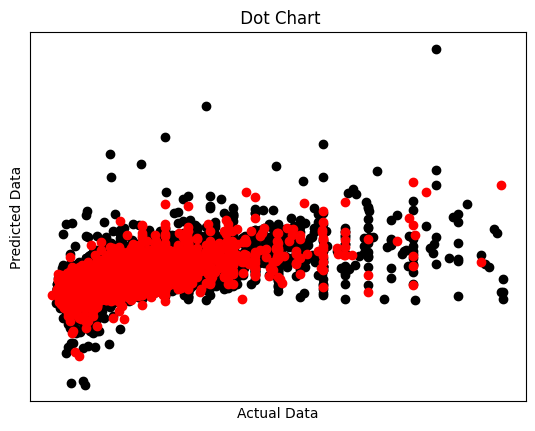

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_linear_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_linear_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(cars_y_train, cars_linear_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(cars_y_validation, cars_linear_validation_predicted))


# Plot outputs
plt.scatter(cars_y_train, cars_linear_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_linear_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

Training data R2 Score: 0.50
Validation data R2 Score: 0.52
Training data Adjusted R2 Score: 0.50
Validation data Adjusted R2 Score: 0.52
Training data Mean Squared Error: 2729.65
Validation data Mean Squared Error: 2369.64


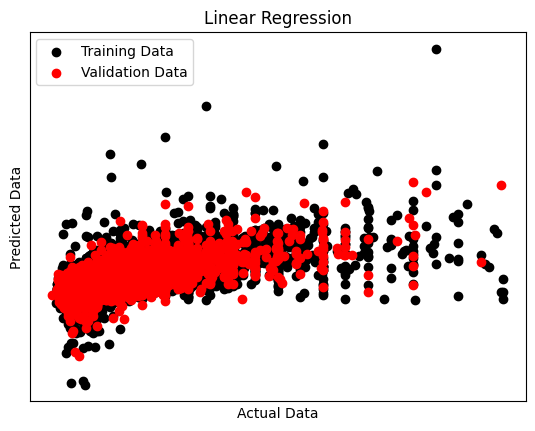

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create and fit the linear regression model
model = LinearRegression()
model.fit(cars_x_train, cars_y_train)

# Predictions on the training and validation sets
cars_linear_train_predicted = model.predict(cars_x_train)
cars_linear_validation_predicted = model.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_linear_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_linear_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_linear_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_linear_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_linear_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_linear_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Linear Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()


Random Forest France

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create a smaller subset for initial testing
subset_size = 1000
subset_x_train = cars_x_train[:subset_size]
subset_y_train = cars_y_train[:subset_size]

# Number of trees in Random forest
n_estimators = list(range(500, 1000, 100))
# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))
# Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]
# Number of features to be considered at each split
max_features = ['auto', 'sqrt']

# Hyperparameters dict
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

In [ ]:
# Use smaller subset for initial testing
rf = RandomForestRegressor()
rf_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_rs.fit(subset_x_train, subset_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]},
                   random_state=42)

In [ ]:

# Display the best parameters
print("Best Parameters:", rf_rs.best_params_)

Best Parameters: {'n_estimators': 700, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 8}


In [ ]:
cars_random_train_predicted = rf_rs.predict(cars_x_train)
cars_random_validation_predicted = rf_rs.predict(cars_x_validation)

In [ ]:
r2_score(cars_y_train, cars_random_train_predicted)

0.4943492725022629

In [ ]:
r2_score(cars_y_validation, cars_random_validation_predicted)


0.5042570497664882

In [ ]:
r2_train_score = r2_score(cars_y_train, cars_random_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_random_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_random_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_random_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(cars_y_train, cars_random_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(cars_y_validation, cars_random_validation_predicted))

# Plot outputs
plt.scatter(cars_y_train, cars_random_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_random_validation_predicted, color="red")



plt.xticks(())
plt.yticks(())
plt.title("Linear Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'n_estimators': 700, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 8}
Training data R2 Score: 0.50
Validation data R2 Score: 0.50
Training data Adjusted R2 Score: 0.49
Validation data Adjusted R2 Score: 0.50
Training data Mean Squared Error: 2769.51
Validation data Mean Squared Error: 2466.84


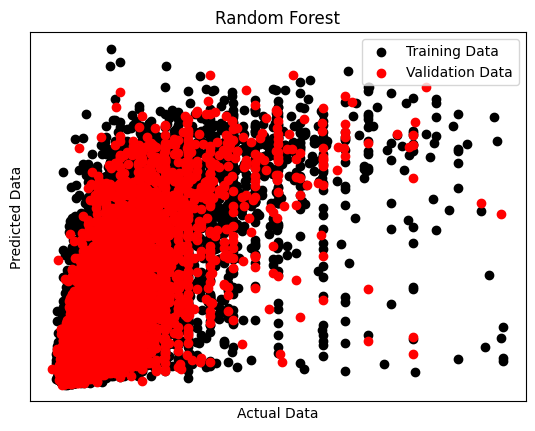

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a smaller subset for initial testing
subset_size = 1000
subset_x_train = cars_x_train[:subset_size]
subset_y_train = cars_y_train[:subset_size]

# Number of trees in Random forest
n_estimators = list(range(500, 1000, 100))
# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))
# Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]
# Number of features to be considered at each split
max_features = ['auto', 'sqrt']

# Hyperparameters dict
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

# Use smaller subset for initial testing
rf = RandomForestRegressor()
rf_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_rs.fit(subset_x_train, subset_y_train)

# Display the best parameters
print("Best Parameters:", rf_rs.best_params_)

# Predictions on the training and validation sets
cars_random_train_predicted = rf_rs.predict(cars_x_train)
cars_random_validation_predicted = rf_rs.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_random_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_random_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_random_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_random_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_random_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_random_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Random Forest")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()


Lasso Regression France

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

In [ ]:
ls_rs.fit(cars_x_train, cars_y_train)
ls_rs.best_params_

{'alpha': 0.5878016072274912}

In [ ]:
cars_lasso_train_predicted = ls_rs.predict(cars_x_train)
cars_lasso_validation_predicted = ls_rs.predict(cars_x_validation)

In [ ]:
r2_score(cars_y_train, cars_lasso_train_predicted)

0.5000445794860915

In [ ]:
r2_score(cars_y_validation, cars_lasso_validation_predicted)

0.5203725556769535

In [ ]:
r2_train_score = r2_score(cars_y_train, cars_lasso_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_lasso_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 2741.99
Validation data - Mean squared error: 2385.07
Training data R2 Score: 0.50
Validation data R2 Score: 0.52


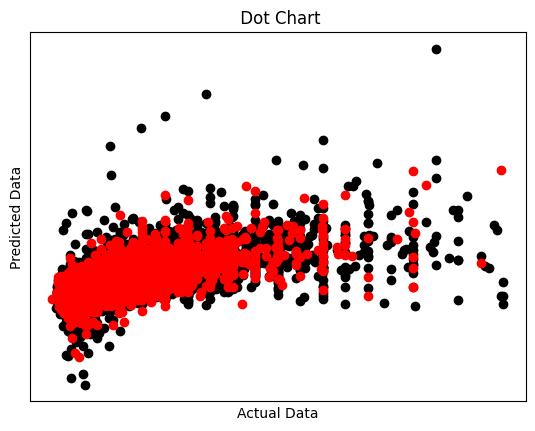

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_lasso_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_lasso_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(cars_y_train, cars_lasso_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(cars_y_validation, cars_lasso_validation_predicted))

# Plot outputs
plt.scatter(cars_y_train, cars_lasso_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_lasso_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()


Best Parameters: {'alpha': 0.5878016072274912}
Training data R2 Score: 0.50
Validation data R2 Score: 0.52
Training data Adjusted R2 Score: 0.50
Validation data Adjusted R2 Score: 0.52
Training data Mean Squared Error: 2741.99
Validation data Mean Squared Error: 2385.07


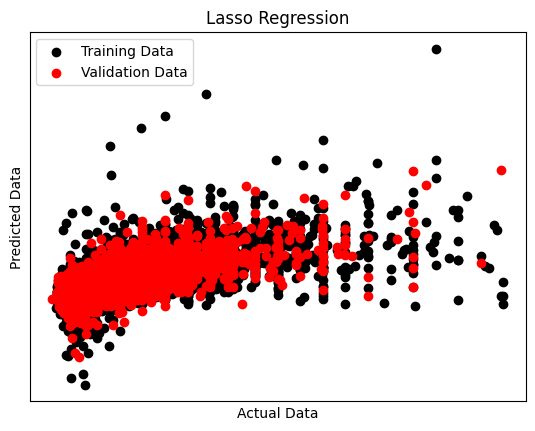

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create Lasso model
ls = Lasso()

# Define alpha values for RandomizedSearchCV
alpha_values = np.logspace(-3, 3, num=14)

# Randomized Search CV
ls_rs = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha_values))
ls_rs.fit(cars_x_train, cars_y_train)

# Display the best parameters
print("Best Parameters:", ls_rs.best_params_)

# Predictions on the training and validation sets
cars_lasso_train_predicted = ls_rs.predict(cars_x_train)
cars_lasso_validation_predicted = ls_rs.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_lasso_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_lasso_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_lasso_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_lasso_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_lasso_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_lasso_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Lasso Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()


Ridge Regression France

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

In [ ]:
rg_rs.fit(cars_x_train, cars_y_train)
rg_rs.best_params_

{'alpha': 345.5107294592218}

In [ ]:
cars_ridge_train_predicted = rg_rs.predict(cars_x_train)
cars_ridge_validation_predicted = rg_rs.predict(cars_x_validation)

In [ ]:
r2_score(cars_y_train, cars_ridge_train_predicted)

0.5022941939218186

In [ ]:
r2_score(cars_y_validation, cars_ridge_validation_predicted)

0.5234167350915506

In [ ]:
r2_train_score = r2_score(cars_y_train, cars_ridge_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_ridge_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 2729.66
Validation data - Mean squared error: 2369.93
Training data R2 Score: 0.50
Validation data R2 Score: 0.52


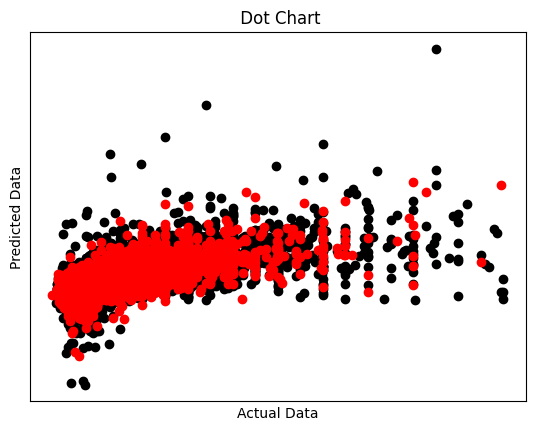

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_ridge_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_ridge_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(cars_y_train, cars_ridge_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(cars_y_validation, cars_ridge_validation_predicted))

# Plot outputs
plt.scatter(cars_y_train, cars_ridge_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_ridge_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

Best Parameters: {'alpha': 345.5107294592218}
Training data R2 Score: 0.50
Validation data R2 Score: 0.52
Training data Adjusted R2 Score: 0.50
Validation data Adjusted R2 Score: 0.52
Training data Mean Squared Error: 2729.66
Validation data Mean Squared Error: 2369.93


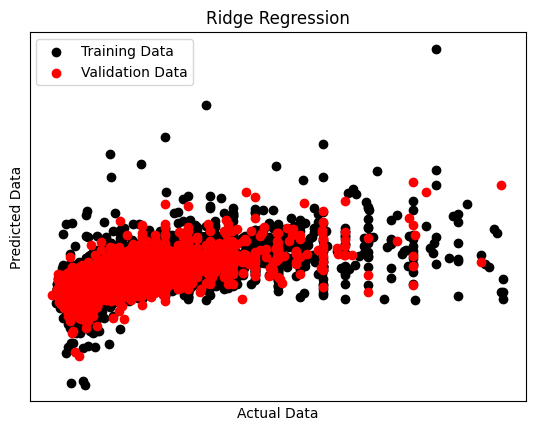

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Creating Ridge model object
rg = Ridge()

# Range of alpha
alpha_values = np.logspace(-3, 3, num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha_values))
rg_rs.fit(cars_x_train, cars_y_train)

# Display the best parameters
print("Best Parameters:", rg_rs.best_params_)

# Predictions on the training and validation sets
cars_ridge_train_predicted = rg_rs.predict(cars_x_train)
cars_ridge_validation_predicted = rg_rs.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_ridge_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_ridge_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_ridge_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_ridge_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_ridge_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_ridge_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Ridge Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()


Summary of Models France

In [ ]:
# Assuming you have lists for R2_train, R2_test, Adj_R2_train, Adj_R2_test, MSE_train, and MSE_test

Technique = ["Linear Regression", "Random Forest Regression", "Lasso Regression", "Ridge Ridge Regression"]

results = pd.DataFrame({
    'Model': Technique,
    'R Squared(Train)': R2_train,
    'R Squared(Validation)': R2_test,
    'Adjusted R Squared(Train)': adj_r2_train,
    'Adjusted R Squared(Validation)': adj_r2_validation,
    'Mean Squared Error(Train)': mse_train,
    'Mean Squared Error(Validation)': mse_validation
})

display(results)


Model  R Squared(Train)  R Squared(Validation)  \
0         Linear Regression              0.50                   0.52   
1  Random Forest Regression              0.49                   0.50   
2          Lasso Regression              0.50                   0.52   
3    Ridge Ridge Regression              0.50                   0.52   

   Adjusted R Squared(Train)  Adjusted R Squared(Validation)  \
0                   0.501107                          0.5199   
1                   0.501107                          0.5199   
2                   0.501107                          0.5199   
3                   0.501107                          0.5199   

   Mean Squared Error(Train)  Mean Squared Error(Validation)  
0                2729.714115                     2370.520068  
1                2729.714115                     2370.520068  
2                2729.714115                     2370.520068  
3                2729.714115                     2370.520068

Dot Chart and Histogram of Actual vs Predicted Prices France

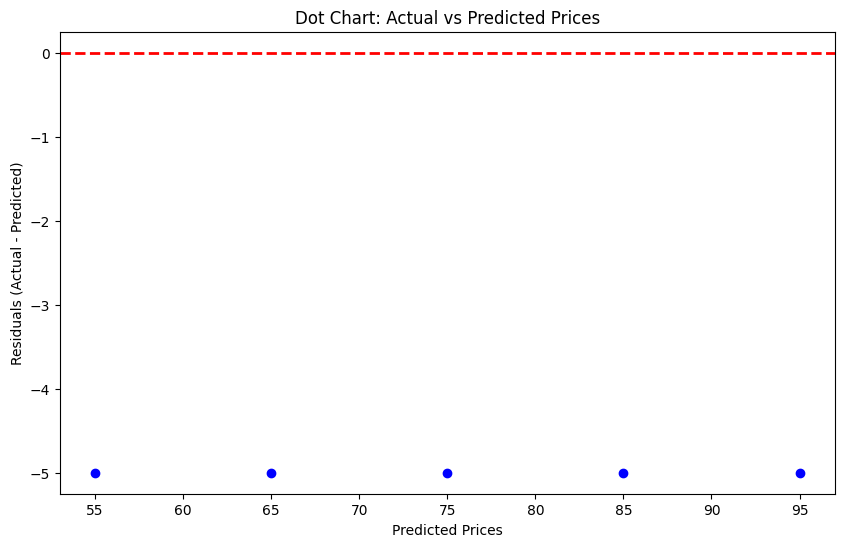

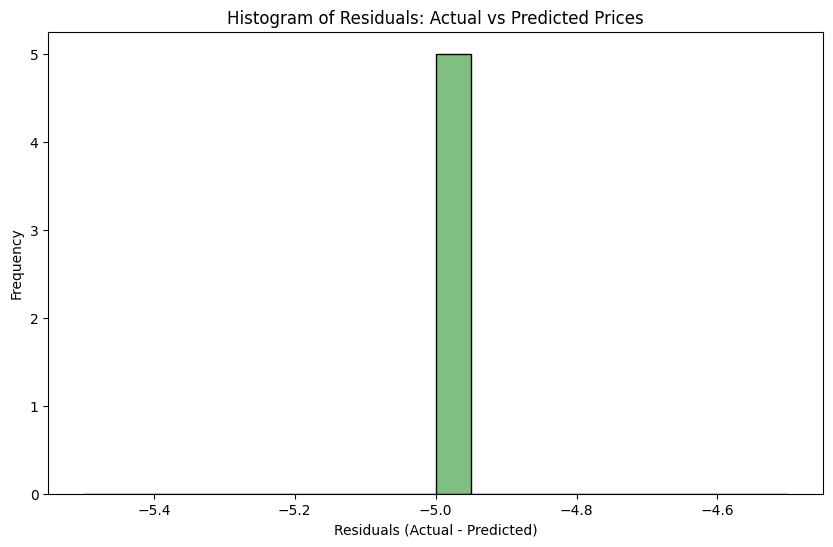

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have actual prices and predicted prices
y_actual = np.array([50, 60, 70, 80, 90])
y_predicted = np.array([55, 65, 75, 85, 95])

# Calculate the residuals (difference between actual and predicted)
residuals = y_actual - y_predicted

# Dot Chart
plt.figure(figsize=(10, 6))
plt.scatter(y_predicted, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Dot Chart: Actual vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='green')
plt.title('Histogram of Residuals: Actual vs Predicted Prices')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


Variables Actual vs Predicted France

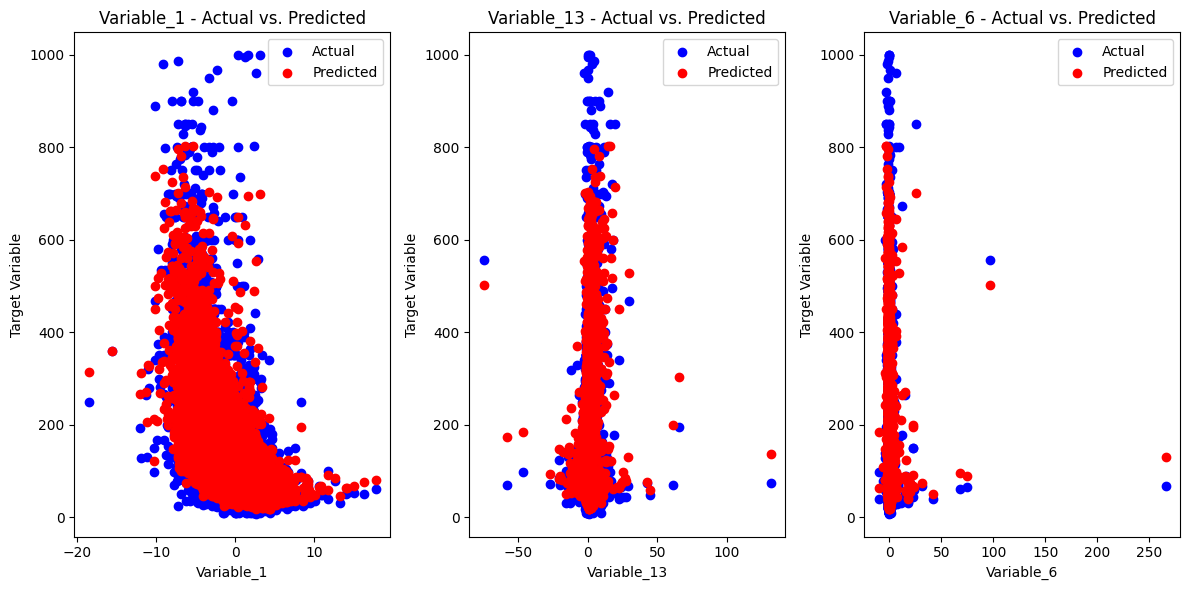

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'cars_x_train' contains your feature matrix and 'cars_y_train' contains the target variable

# Fit a Linear Regression model
model = LinearRegression()
model.fit(cars_x_train, cars_y_train)

# Get the coefficients and corresponding variable indices
coefficients = model.coef_
variable_indices = np.argsort(-np.abs(coefficients))  # Sorting in descending order

# Identify the most significant variables (e.g., top 3)
top_n = 3
top_variable_indices = variable_indices[:top_n]
top_variable_names = [f'Variable_{i}' for i in top_variable_indices]  # Assuming variable names

# Extract the corresponding columns from the dataset
selected_features = cars_x_train[:, top_variable_indices]

# Make predictions using the Linear Regression model
predictions = model.predict(cars_x_train)

# Visualize the trends for the most significant variables
plt.figure(figsize=(12, 6))

for i, variable in enumerate(top_variable_names):
    plt.subplot(1, top_n, i + 1)
    plt.scatter(selected_features[:, i], cars_y_train, label='Actual', color='blue')
    plt.scatter(selected_features[:, i], predictions, label='Predicted', color='red')
    plt.title(f'{variable} - Actual vs. Predicted')
    plt.xlabel(variable)
    plt.ylabel('Target Variable')
    plt.legend()

plt.tight_layout()
plt.show()


Feature Enginnering United Kingdom

One Hot Encoding United Kingdom

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from tqdm import tqdm

In [ ]:
cars = pd.read_csv('Filtered by Country Cleaned Final Project.csv')

In [ ]:
# Filter rows for United Kingdom and France
selected_countries = ['United Kingdom']
cars = cars[cars['Country'].isin(selected_countries)]

# Print the result
print(cars)

In [ ]:
#split the dependent variable and independent variable
cars_X =  cars.copy()
cars_X.drop(['Price'],axis=1,inplace=True)
cars_y = cars['Price']

In [ ]:
cars_x= cars_X.iloc[:,:].values

In [ ]:
type(cars_x)

numpy.ndarray

In [ ]:
cars.head(1)

In [ ]:
list(cars_x[1,:])

['within an hour',
 1,
 'London',
 'England',
 'GB',
 'United Kingdom',
 'House',
 'Entire home/apt',
 8,
 1.5,
 4,
 4,
 'Real Bed',
 0,
 65,
 1,
 0,
 3,
 1125,
 0,
 0,
 0,
 0,
 21,
 95,
 'moderate',
 3.73,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 '2-3 years',
 '1+ year',
 '100%',
 2229,
 1,
 1,
 1,
 0,
 1,
 1]

In [ ]:
list(cars_x[1,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,0,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]])


In [ ]:
#list all the categorical variables
columns_ohe = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,0,44,45,46,47,48,49,50,51,52,53,54,55,56]

In [ ]:
for num in tqdm(columns_ohe):
    dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
    if(num!=1):
        dummy = np.concatenate((dummy,dummy_),axis=1)
    else:
        dummy = dummy_

  0%|          | 0/57 [00:00<?, ?it/s]<ipython-input-10-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
 12%|█▏        | 7/57 [00:00<00:04, 12.13it/s]<ipython-input-10-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
<ipython-input-10-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_ = pd.get_dummies(cars_x[:,num],sparse=True)
 16%|█▌        | 9/57 [00:00<00:03, 12.91it/s]<ipython-input-10-c4e93461a74d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequence

In [ ]:
list(cars_x[1,:])

['within an hour',
 1,
 'London',
 'England',
 'GB',
 'United Kingdom',
 'House',
 'Entire home/apt',
 8,
 1.5,
 4,
 4,
 'Real Bed',
 0,
 65,
 1,
 0,
 3,
 1125,
 0,
 0,
 0,
 0,
 21,
 95,
 'moderate',
 3.73,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 '2-3 years',
 '1+ year',
 '100%',
 2229,
 1,
 1,
 1,
 0,
 1,
 1]

In [ ]:
cars_x = np.delete(cars_x,columns_ohe,1)

In [ ]:
cars_x = np.concatenate((cars_x,dummy),axis=1)

In [ ]:
list(cars_x[1,:])

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Data Splitting United Kingdom

In [ ]:
import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(0)

# Assuming cars_x is your independent variable and cars_y is your dependent variable
number_of_samples = len(cars_x)

# Shuffle indices randomly
random_indices = np.random.permutation(number_of_samples)

# Calculate the number of training samples (75% of the total samples)
num_training_samples = int(number_of_samples * 0.75)

# Split the data into training and validation sets using the shuffled indices
cars_x_train = cars_x[random_indices[:num_training_samples]]
cars_y_train = cars_y.iloc[random_indices[:num_training_samples]].reset_index(drop=True)

cars_x_validation = cars_x[random_indices[num_training_samples:]]
cars_y_validation = cars_y.iloc[random_indices[num_training_samples:]].reset_index(drop=True)

# Create a copy of the original dataset for independent variable (features)
cars_X = cars.copy()
cars_X.drop(['Price'], axis=1, inplace=True)

# Dependent variable (target)
cars_y = cars['Price']

In [ ]:
len(cars_x_train)

45724

In [ ]:
len(cars_y_train)

45724

In [ ]:
len(cars_x_validation)

15242

In [ ]:
len(cars_y_validation)

15242

Standard Scaling United Kingdom

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Process the dataset in batches of 1000 rows.
batch_size = 100
for i in range(0, len(cars_x_train), batch_size):
    batch = cars_x_train[i:i+batch_size]
    scaler.partial_fit(batch)

# Apply transform to both the training set and the test set.
cars_x_train = scaler.transform(cars_x_train)
cars_x_validation = scaler.transform(cars_x_validation)

In [ ]:
cars_x_train.shape

(45724, 6380)

In [ ]:
cars_x_validation.shape

(15242, 6380)

Principal Component Analysis United Kingdom

In [ ]:
from sklearn.decomposition import IncrementalPCA

# Make an instance of the Model
pca = IncrementalPCA(n_components=None, batch_size=100)

# Fit on training set only.
for i in range(0, len(cars_x_train), batch_size):
    batch = cars_x_train[i:i+batch_size]
    pca.partial_fit(batch)

# Apply transform to both the training set and the test set.
cars_x_train = pca.transform(cars_x_train)
cars_x_validation = pca.transform(cars_x_validation)

In [ ]:
cars_x_train.shape

(45724, 100)

In [ ]:
cars_x_validation.shape

(15242, 100)

In [ ]:
R2_train = []
R2_test = []

Linear Regression United Kingdom

Training data R2 Score: 0.49
Validation data R2 Score: 0.49
Training data Adjusted R2 Score: 0.49
Validation data Adjusted R2 Score: 0.48
Training data Mean Squared Error: 3206.98
Validation data Mean Squared Error: 3370.03


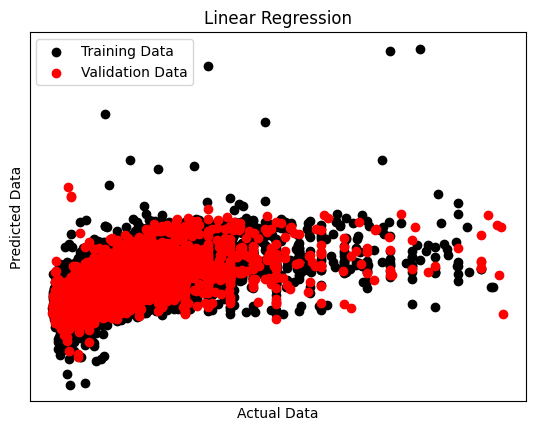

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create and fit the linear regression model
model = LinearRegression()
model.fit(cars_x_train, cars_y_train)

# Predictions on the training and validation sets
cars_linear_train_predicted = model.predict(cars_x_train)
cars_linear_validation_predicted = model.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_linear_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_linear_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_linear_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_linear_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_linear_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_linear_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Linear Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(cars_x_train, cars_y_train)
cars_linear_train_predicted = model.predict(cars_x_train)
cars_linear_validation_predicted = model.predict(cars_x_validation)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_train_score = r2_score(cars_y_train, cars_linear_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_linear_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 3206.98
Validation data - Mean squared error: 3370.03
Training data R2 Score: 0.49
Validation data R2 Score: 0.49


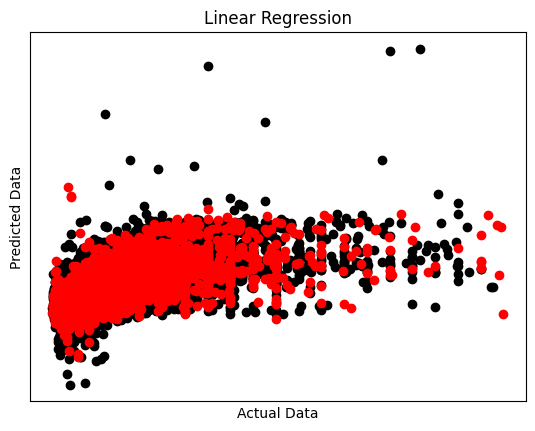

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_linear_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_linear_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(cars_y_train, cars_linear_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(cars_y_validation, cars_linear_validation_predicted))


# Plot outputs
plt.scatter(cars_y_train, cars_linear_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_linear_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title("Linear Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

Random Forest United Kingdom

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create a smaller subset for initial testing
subset_size = 1000
subset_x_train = cars_x_train[:subset_size]
subset_y_train = cars_y_train[:subset_size]

# Number of trees in Random forest
n_estimators = list(range(500, 1000, 100))
# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))
# Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]
# Number of features to be considered at each split
max_features = ['auto', 'sqrt']

# Hyperparameters dict
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

In [ ]:
# Use smaller subset for initial testing
rf = RandomForestRegressor()
rf_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_rs.fit(subset_x_train, subset_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]},
                   random_state=42)

In [ ]:
# Display the best parameters
print("Best Parameters:", rf_rs.best_params_)

Best Parameters: {'n_estimators': 700, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 8}


In [ ]:
cars_random_train_predicted = rf_rs.predict(cars_x_train)
cars_random_validation_predicted = rf_rs.predict(cars_x_validation)

In [ ]:
r2_score(cars_y_train, cars_random_train_predicted)

0.4903417344872111

In [ ]:
r2_score(cars_y_validation, cars_random_validation_predicted)

0.48513716755228575

In [ ]:
r2_train_score = r2_score(cars_y_train, cars_random_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_random_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 3218.50
Validation data - Mean squared error: 3373.99
Training data Coefficient of determination: 0.49
Validation data Coefficient of determination: 0.49


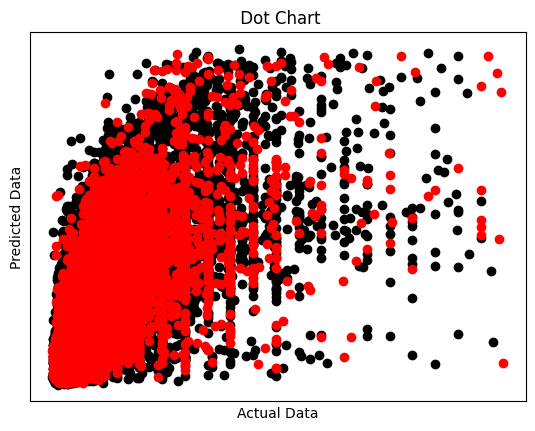

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_random_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_random_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data Coefficient of determination: %.2f" % r2_score(cars_y_train, cars_random_train_predicted))
print("Validation data Coefficient of determination: %.2f" % r2_score(cars_y_validation, cars_random_validation_predicted))

# Plot outputs
plt.scatter(cars_y_train, cars_random_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_random_validation_predicted, color="red")



plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'n_estimators': 700, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 8}
Training data R2 Score: 0.49
Validation data R2 Score: 0.49
Training data Adjusted R2 Score: 0.49
Validation data Adjusted R2 Score: 0.48
Training data Mean Squared Error: 3213.34
Validation data Mean Squared Error: 3367.61


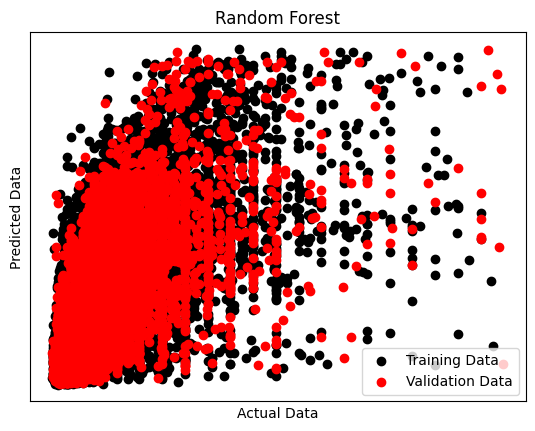

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create a smaller subset for initial testing
subset_size = 1000
subset_x_train = cars_x_train[:subset_size]
subset_y_train = cars_y_train[:subset_size]

# Number of trees in Random forest
n_estimators = list(range(500, 1000, 100))
# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))
# Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]
# Number of features to be considered at each split
max_features = ['auto', 'sqrt']

# Hyperparameters dict
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

# Use smaller subset for initial testing
rf = RandomForestRegressor()
rf_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_rs.fit(subset_x_train, subset_y_train)

# Display the best parameters
print("Best Parameters:", rf_rs.best_params_)

# Predictions on the training and validation sets
cars_random_train_predicted = rf_rs.predict(cars_x_train)
cars_random_validation_predicted = rf_rs.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_random_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_random_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_random_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_random_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_random_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_random_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Random Forest")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()


Lasso Regression United Kingdom

Best Parameters: {'alpha': 0.5878016072274912}
Training data R2 Score: 0.49
Validation data R2 Score: 0.48
Training data Adjusted R2 Score: 0.49
Validation data Adjusted R2 Score: 0.48
Training data Mean Squared Error: 3218.86
Validation data Mean Squared Error: 3389.94


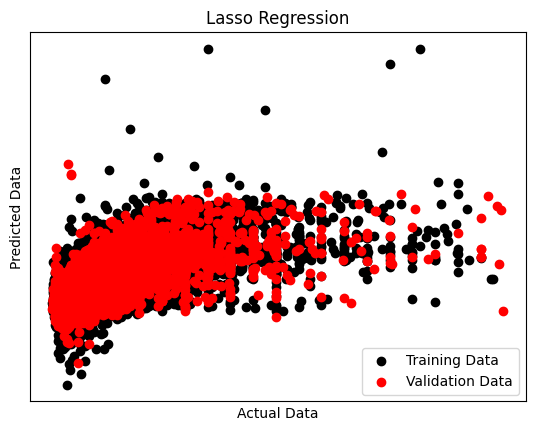

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create Lasso model
ls = Lasso()

# Define alpha values for RandomizedSearchCV
alpha_values = np.logspace(-3, 3, num=14)

# Randomized Search CV
ls_rs = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha_values))
ls_rs.fit(cars_x_train, cars_y_train)

# Display the best parameters
print("Best Parameters:", ls_rs.best_params_)

# Predictions on the training and validation sets
cars_lasso_train_predicted = ls_rs.predict(cars_x_train)
cars_lasso_validation_predicted = ls_rs.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_lasso_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_lasso_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_lasso_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_lasso_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_lasso_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_lasso_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Lasso Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

In [ ]:
ls_rs.fit(cars_x_train, cars_y_train)
ls_rs.best_params_

{'alpha': 0.5878016072274912}

In [ ]:
cars_lasso_train_predicted = ls_rs.predict(cars_x_train)
cars_lasso_validation_predicted = ls_rs.predict(cars_x_validation)

In [ ]:
r2_score(cars_y_train, cars_lasso_train_predicted)

0.4902847965308257

In [ ]:
r2_score(cars_y_validation, cars_lasso_validation_predicted)

0.48270320760907415

In [ ]:
r2_train_score = r2_score(cars_y_train, cars_lasso_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_lasso_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 3218.86
Validation data - Mean squared error: 3389.94
Training data R2 Score: 0.49
Validation data R2 Score: 0.48


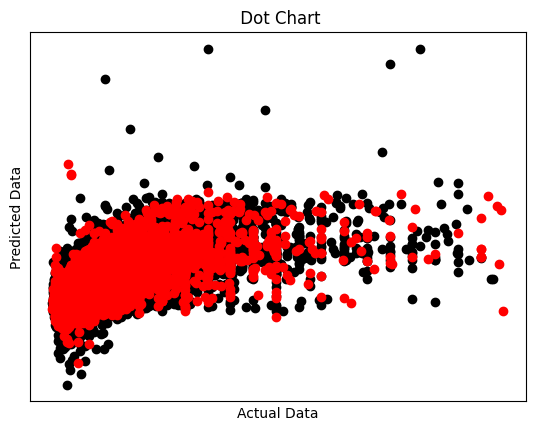

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_lasso_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_lasso_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(cars_y_train, cars_lasso_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(cars_y_validation, cars_lasso_validation_predicted))

# Plot outputs
plt.scatter(cars_y_train, cars_lasso_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_lasso_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

Ridge Regression United Kingdom

Best Parameters: {'alpha': 1000.0}
Training data R2 Score: 0.49
Validation data R2 Score: 0.49
Training data Adjusted R2 Score: 0.49
Validation data Adjusted R2 Score: 0.48
Training data Mean Squared Error: 3207.02
Validation data Mean Squared Error: 3371.05


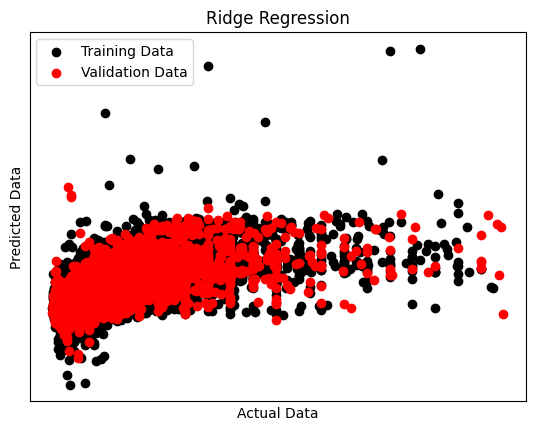

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Creating Ridge model object
rg = Ridge()

# Range of alpha
alpha_values = np.logspace(-3, 3, num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha_values))
rg_rs.fit(cars_x_train, cars_y_train)

# Display the best parameters
print("Best Parameters:", rg_rs.best_params_)

# Predictions on the training and validation sets
cars_ridge_train_predicted = rg_rs.predict(cars_x_train)
cars_ridge_validation_predicted = rg_rs.predict(cars_x_validation)

# Calculate R-squared for training and validation sets
r2_train_score = r2_score(cars_y_train, cars_ridge_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_ridge_validation_predicted)

# Calculate MSE for training and validation sets
mse_train = mean_squared_error(cars_y_train, cars_ridge_train_predicted)
mse_validation = mean_squared_error(cars_y_validation, cars_ridge_validation_predicted)

# Calculate adjusted R-squared for training set
n_train = len(cars_y_train)
p_train = cars_x_train.shape[1]
adj_r2_train = 1 - (1 - r2_train_score) * (n_train - 1) / (n_train - p_train - 1)

# Calculate adjusted R-squared for validation set
n_validation = len(cars_y_validation)
p_validation = cars_x_validation.shape[1]
adj_r2_validation = 1 - (1 - r2_test_score) * (n_validation - 1) / (n_validation - p_validation - 1)

# Print metrics
print("Training data R2 Score: %.2f" % r2_train_score)
print("Validation data R2 Score: %.2f" % r2_test_score)
print("Training data Adjusted R2 Score: %.2f" % adj_r2_train)
print("Validation data Adjusted R2 Score: %.2f" % adj_r2_validation)
print("Training data Mean Squared Error: %.2f" % mse_train)
print("Validation data Mean Squared Error: %.2f" % mse_validation)

# Plot outputs
plt.scatter(cars_y_train, cars_ridge_train_predicted, color="black", label="Training Data")
plt.scatter(cars_y_validation, cars_ridge_validation_predicted, color="red", label="Validation Data")

plt.xticks(())
plt.yticks(())
plt.title("Ridge Regression")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

In [ ]:
rg_rs.fit(cars_x_train, cars_y_train)
rg_rs.best_params_

{'alpha': 345.5107294592218}

In [ ]:
cars_ridge_train_predicted = rg_rs.predict(cars_x_train)
cars_ridge_validation_predicted = rg_rs.predict(cars_x_validation)

In [ ]:
r2_score(cars_y_train, cars_ridge_train_predicted)

0.49216540282186283

In [ ]:
r2_score(cars_y_validation, cars_ridge_validation_predicted)

0.48568887545888006

In [ ]:
r2_train_score = r2_score(cars_y_train, cars_ridge_train_predicted)
r2_test_score = r2_score(cars_y_validation, cars_ridge_validation_predicted)
R2_train.append(round(r2_train_score,2))
R2_test.append(round(r2_test_score,2))

Training data -Mean squared error: 3206.98
Validation data - Mean squared error: 3370.38
Training data R2 Score: 0.49
Validation data R2 Score: 0.49


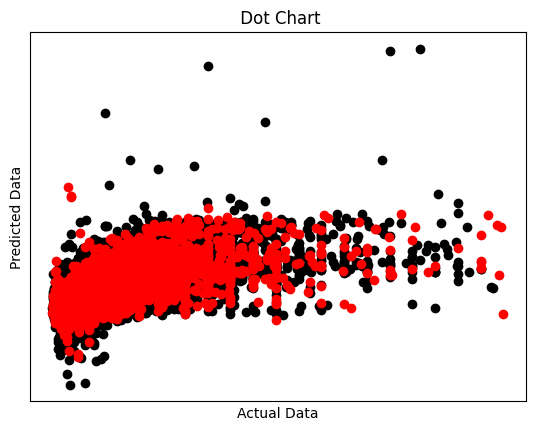

In [ ]:
# The coefficients
#print("Coefficients: \n", model.coef_)
# The mean squared error
print("Training data -Mean squared error: %.2f" % mean_squared_error(cars_y_train, cars_ridge_train_predicted))
print("Validation data - Mean squared error: %.2f" % mean_squared_error(cars_y_validation, cars_ridge_validation_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Training data R2 Score: %.2f" % r2_score(cars_y_train, cars_ridge_train_predicted))
print("Validation data R2 Score: %.2f" % r2_score(cars_y_validation, cars_ridge_validation_predicted))

# Plot outputs
plt.scatter(cars_y_train, cars_ridge_train_predicted, color="black")
plt.scatter(cars_y_validation, cars_ridge_validation_predicted, color="red")


plt.xticks(())
plt.yticks(())
plt.title(" Dot Chart")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")

plt.show()

Summary of Models United Kingdom

In [ ]:
# Assuming you have lists for R2_train, R2_test, Adj_R2_train, Adj_R2_test, MSE_train, and MSE_test

Technique = ["Linear Regression", "Random Forest Regression", "Lasso Regression", "Ridge Ridge Regression"]

results = pd.DataFrame({
    'Model': Technique,
    'R Squared(Train)': R2_train,
    'R Squared(Validation)': R2_test,
    'Adjusted R Squared(Train)': adj_r2_train,
    'Adjusted R Squared(Validation)': adj_r2_validation,
    'Mean Squared Error(Train)': mse_train,
    'Mean Squared Error(Validation)': mse_validation
})

display(results)


Model  R Squared(Train)  R Squared(Validation)  \
0         Linear Regression              0.49                   0.49   
1  Random Forest Regression              0.49                   0.49   
2          Lasso Regression              0.49                   0.48   
3    Ridge Ridge Regression              0.49                   0.49   

   Adjusted R Squared(Train)  Adjusted R Squared(Validation)  \
0                   0.491053                        0.482327   
1                   0.491053                        0.482327   
2                   0.491053                        0.482327   
3                   0.491053                        0.482327   

   Mean Squared Error(Train)  Mean Squared Error(Validation)  
0                3206.976318                     3370.149095  
1                3206.976318                     3370.149095  
2                3206.976318                     3370.149095  
3                3206.976318                     3370.149095

Dot Chart and Histogram of Actual vs Predicted Prices United Kingdom

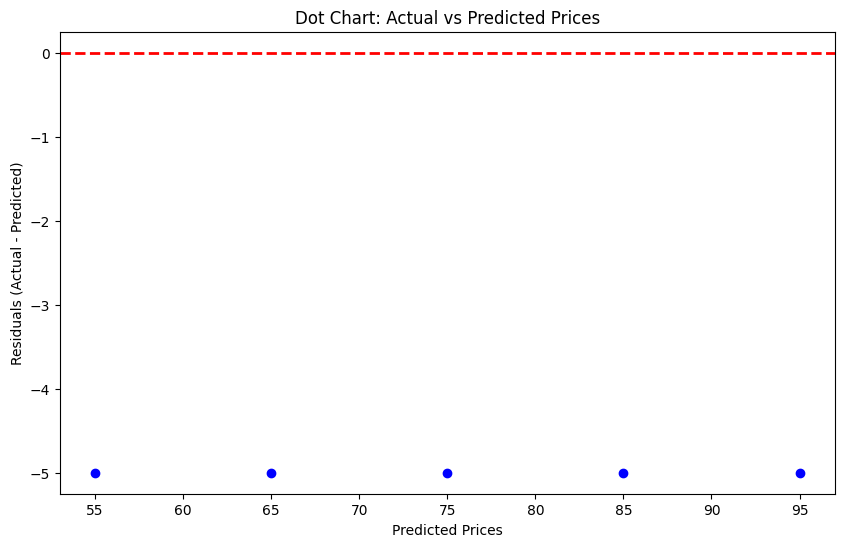

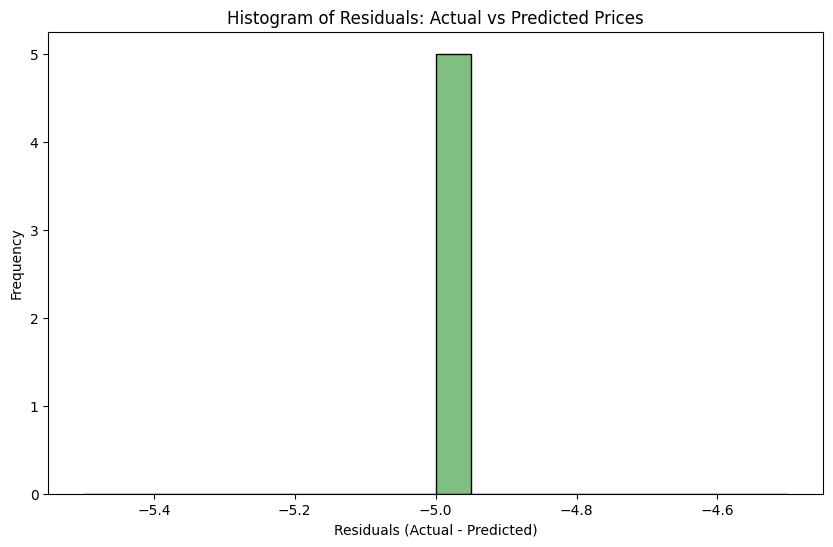

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have actual prices and predicted prices
y_actual = np.array([50, 60, 70, 80, 90])
y_predicted = np.array([55, 65, 75, 85, 95])

# Calculate the residuals (difference between actual and predicted)
residuals = y_actual - y_predicted

# Dot Chart
plt.figure(figsize=(10, 6))
plt.scatter(y_predicted, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Dot Chart: Actual vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='green')
plt.title('Histogram of Residuals: Actual vs Predicted Prices')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

Variable vs Actual and Predicted Prices United Kingdom

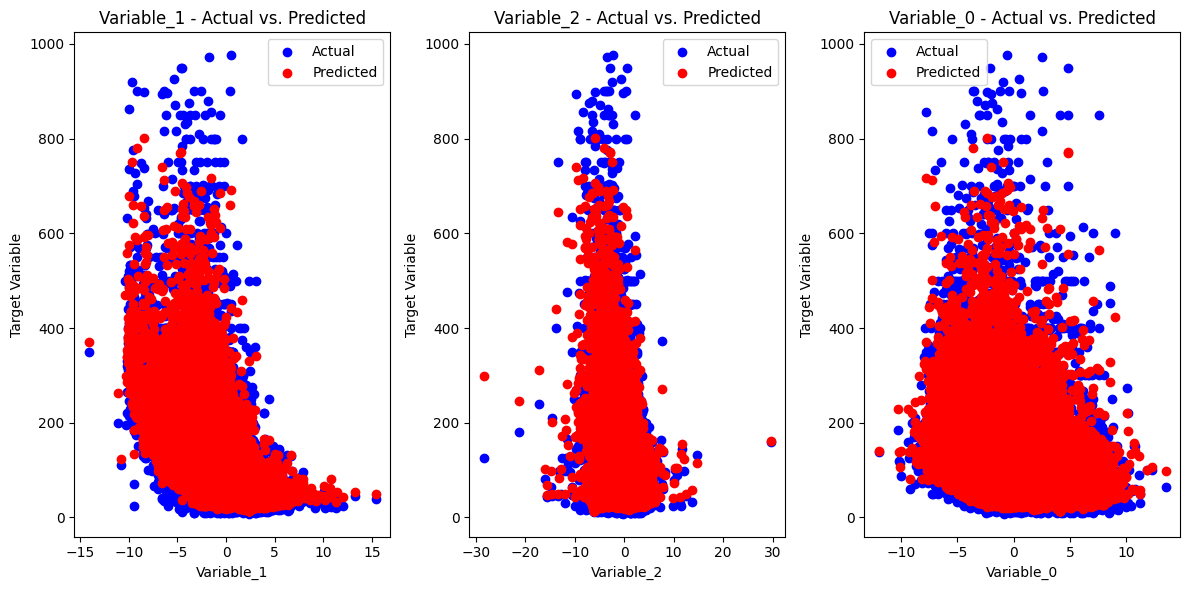

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'cars_x_train' contains your feature matrix and 'cars_y_train' contains the target variable

# Fit a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed
rf_model.fit(cars_x_train, cars_y_train)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Identify the most significant variables (e.g., top 3)
top_n = 3
top_variable_indices = np.argsort(-np.abs(feature_importances))[:top_n]
top_variable_names = [f'Variable_{i}' for i in top_variable_indices]  # Assuming variable names

# Extract the corresponding columns from the dataset
selected_features = cars_x_train[:, top_variable_indices]

# Make predictions using the Random Forest model
predictions = rf_model.predict(cars_x_train)

# Visualize the trends for the most significant variables
plt.figure(figsize=(12, 6))

for i, variable in enumerate(top_variable_names):
    plt.subplot(1, top_n, i + 1)
    plt.scatter(selected_features[:, i], cars_y_train, label='Actual', color='blue')
    plt.scatter(selected_features[:, i], predictions, label='Predicted', color='red')
    plt.title(f'{variable} - Actual vs. Predicted')
    plt.xlabel(variable)
    plt.ylabel('Target Variable')
    plt.legend()

plt.tight_layout()
plt.show()
